In [1]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils_VBFHH as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import json
import copy
from ROOT import TLorentzVector
import uproot


Welcome to JupyROOT 6.18/00


In [2]:
def load_data_rpd(file_name, branches, process,treedir,selection='',entrystop=None,):

    root_file = uproot.open(file_name)
    df = rpd.read_root(file_name,treedir+process, columns = branches).query(selection)
    print("Entries in ntuple:")
    print(len(df))
    return df

In [3]:
year='2018'


indir = '/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'
indir2='/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection_wo_ttHkiller/'

file_ggHH_NLO = 'output_hh_nlo_kl_1_kt_1.root'
#file_ggHH_NLO = 'GluGluToHHTo2B2G_node_cHHH1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_LO = 'GluGluToHHTo2B2G_Era2018_RR-17Sep2018_v2.root'

process_ggHH_NLO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_ggHH_LO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'

features = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
out_dir = indir+'plots_ggHH_LOreweighting/'

df_ggHH_NLO = load_data_rpd(indir2+file_ggHH_NLO, features+['genweight'], process_ggHH_NLO,'tagsDumper/trees/','(genweight<0.1)') #and(HHbbggMVA>0.7)
features+=['benchmark_reweight_SM']
df_ggHH_LO = load_data_rpd(indir+file_ggHH_LO, features, process_ggHH_LO,'tagsDumper/trees/','(diHiggs_pt>0)') 

Entries in ntuple:
17219
Entries in ntuple:
482573


HHbbggMVA


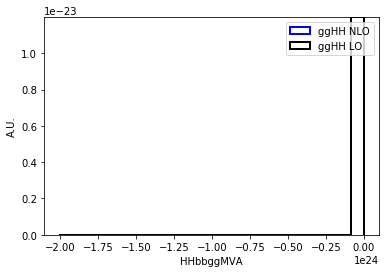

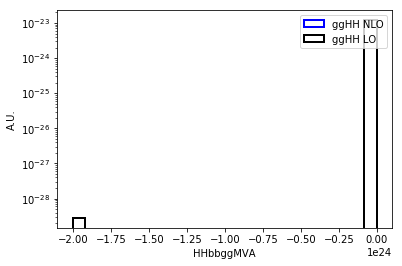

leadingJet_DeepFlavour


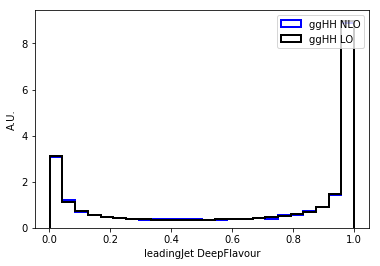

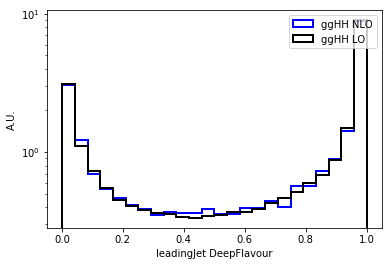

subleadingJet_DeepFlavour


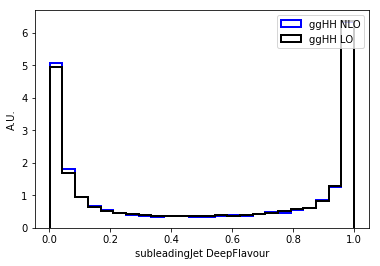

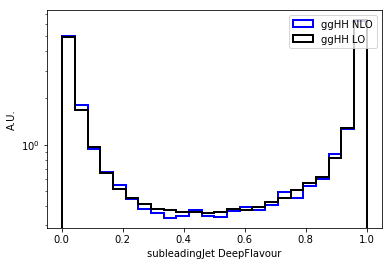

absCosThetaStar_CS


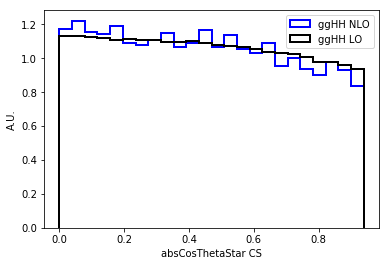

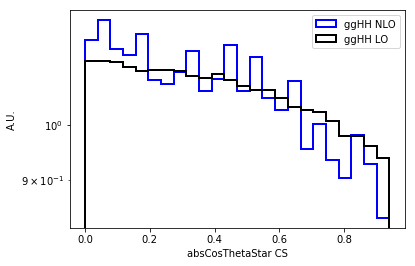

absCosTheta_bb


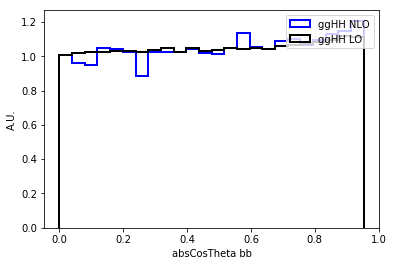

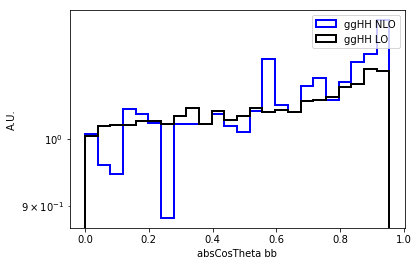

absCosTheta_gg


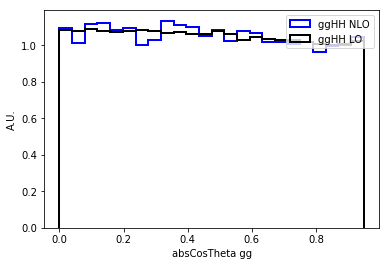

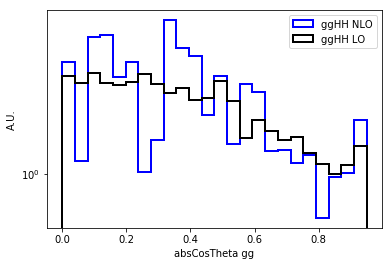

diphotonCandidatePtOverdiHiggsM


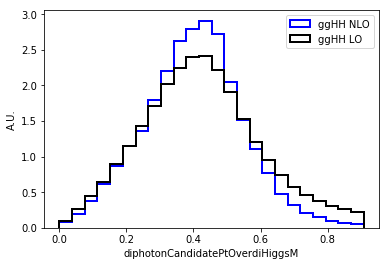

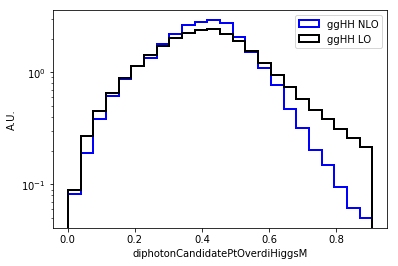

dijetCandidatePtOverdiHiggsM


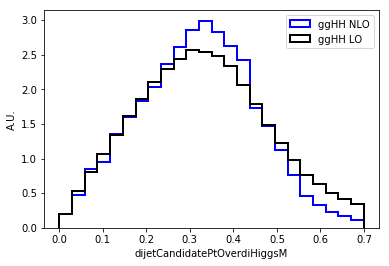

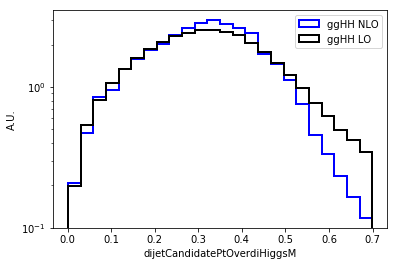

customLeadingPhotonIDMVA


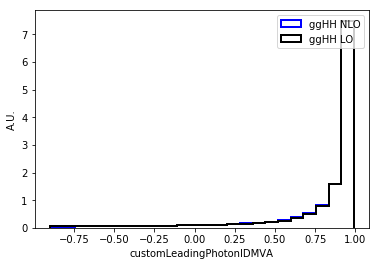

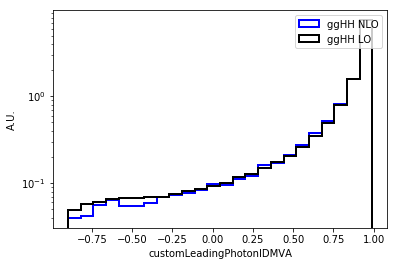

customSubLeadingPhotonIDMVA


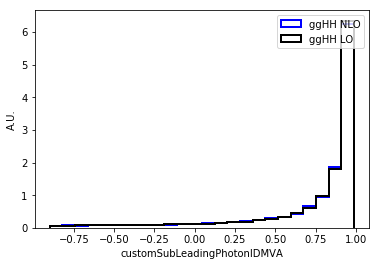

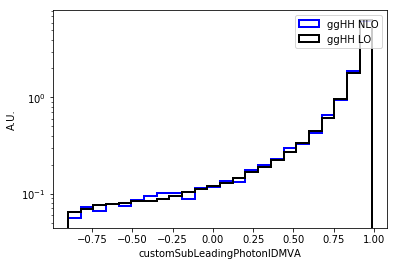

leadingPhotonSigOverE


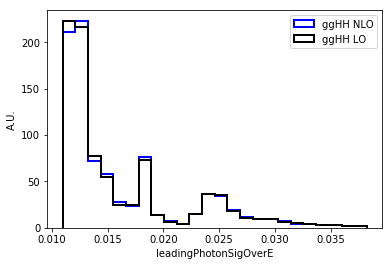

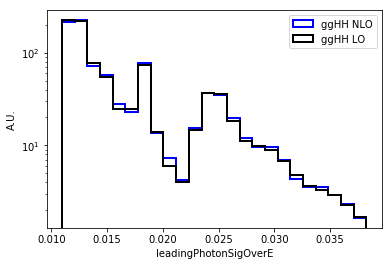

subleadingPhotonSigOverE


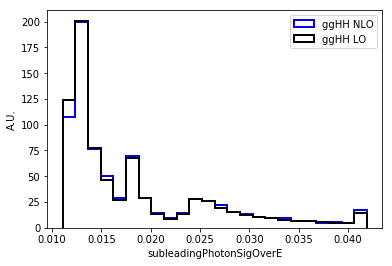

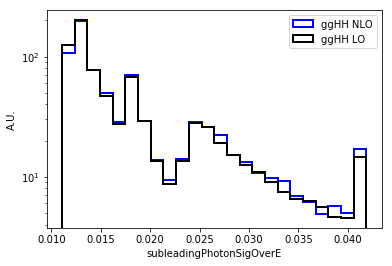

sigmaMOverM


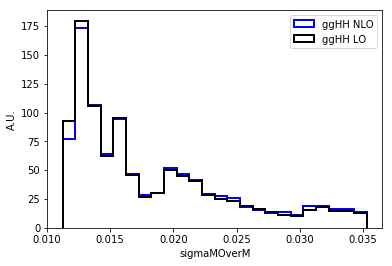

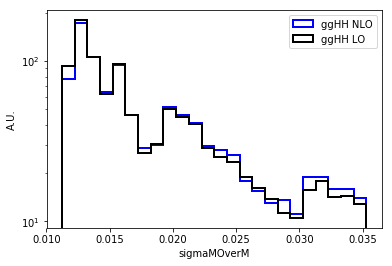

noexpand:(leadingPhoton_pt/CMS_hgg_mass)


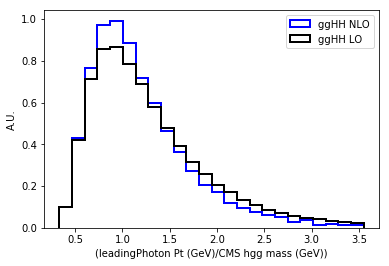

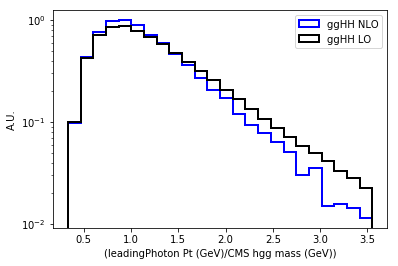

noexpand:(subleadingPhoton_pt/CMS_hgg_mass)


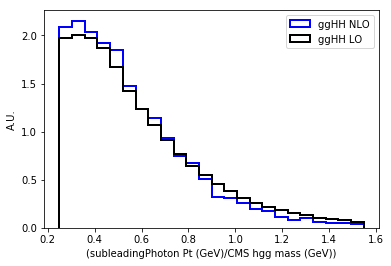

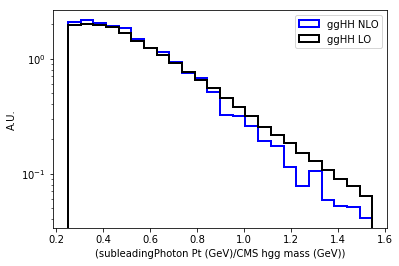

noexpand:(leadingJet_pt/Mjj)


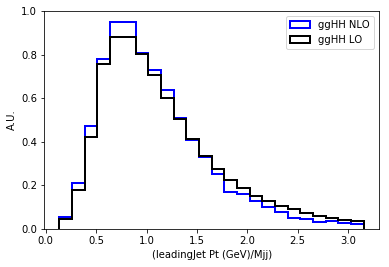

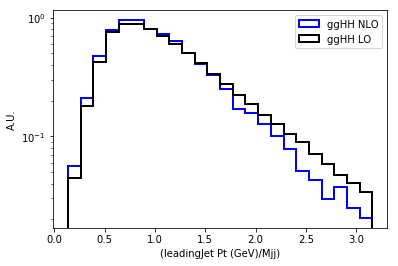

noexpand:(subleadingJet_pt/Mjj)


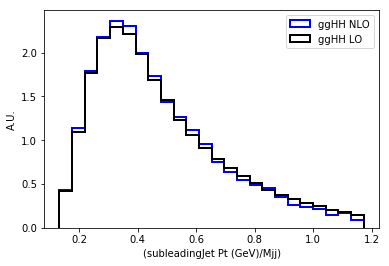

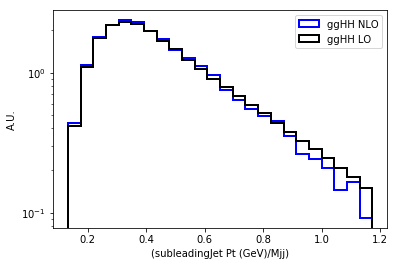

rho


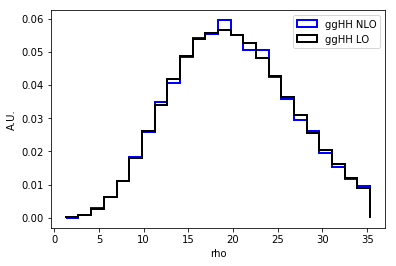

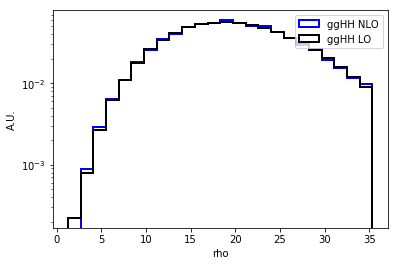

noexpand:(leadingJet_bRegNNResolution*1.4826)


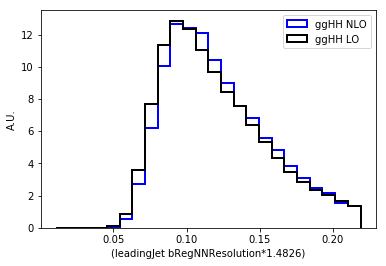

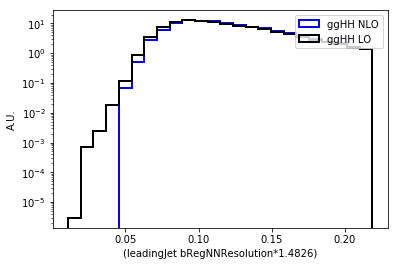

noexpand:(subleadingJet_bRegNNResolution*1.4826)


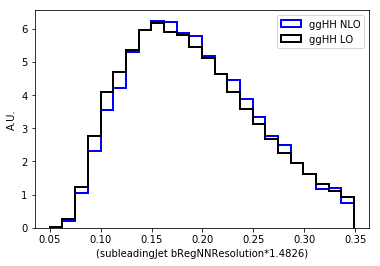

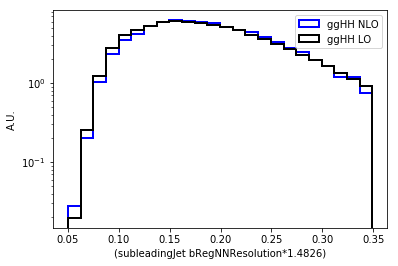

noexpand:(sigmaMJets*1.4826)


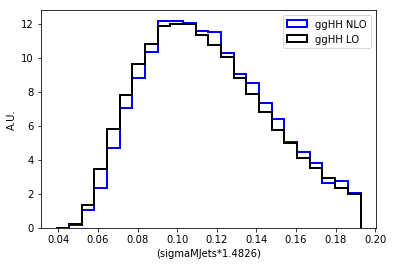

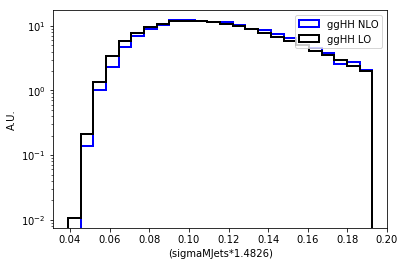

PhoJetMinDr


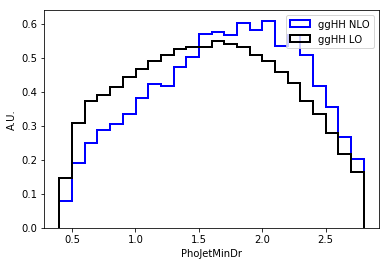

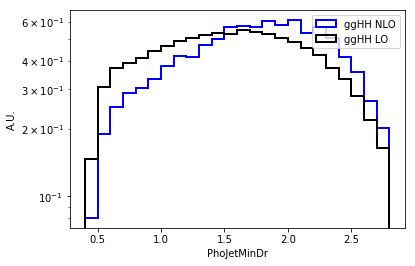

PhoJetOtherDr


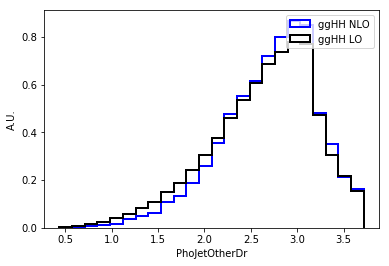

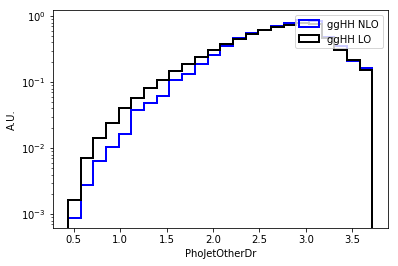

noexpand:(VBFleadJet_pt/VBFJet_mjj)


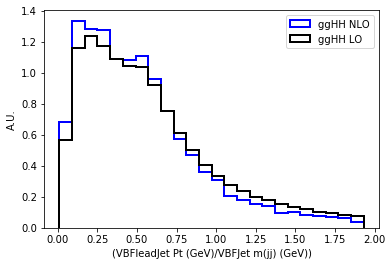

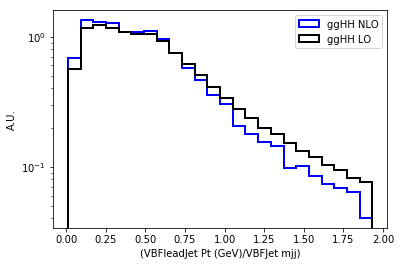

VBFleadJet_eta


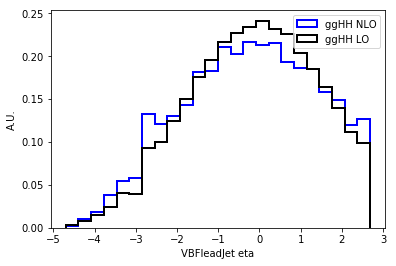

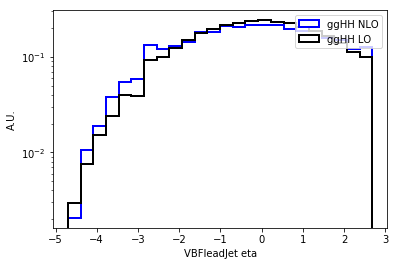

noexpand:(VBFsubleadJet_pt/VBFJet_mjj)


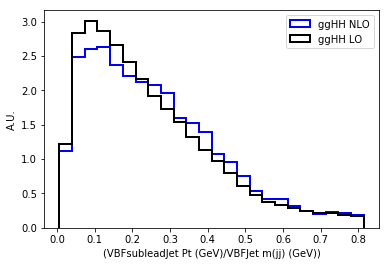

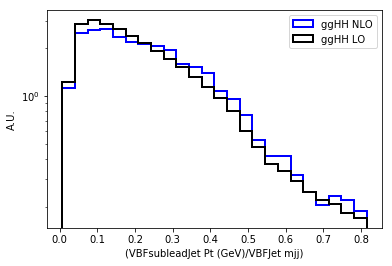

VBFsubleadJet_eta


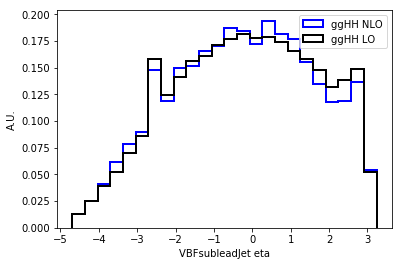

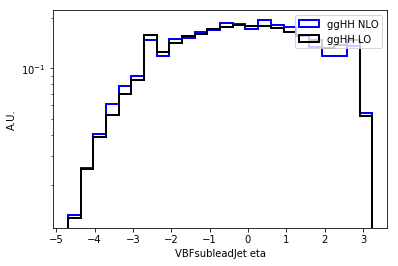

VBFCentrality_jg


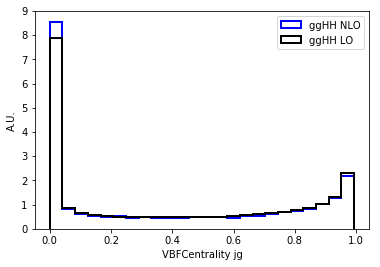

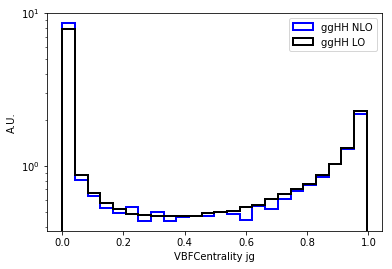

VBFCentrality_jb


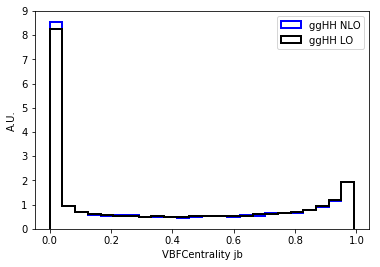

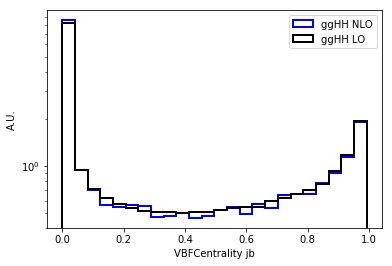

VBFDeltaR_jg


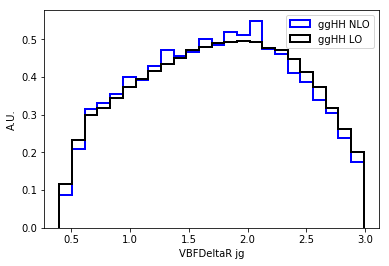

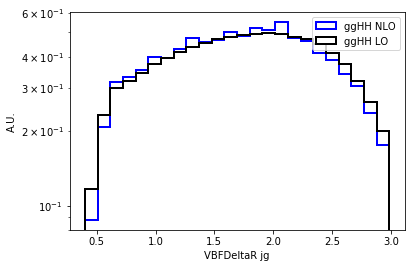

VBFDeltaR_jb


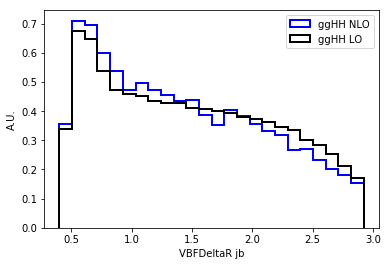

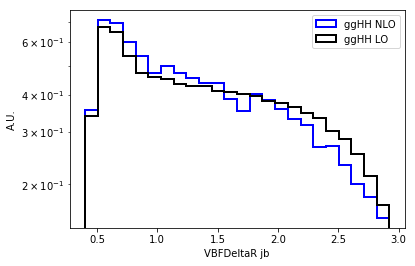

VBFProd_eta


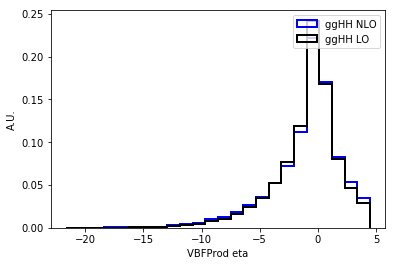

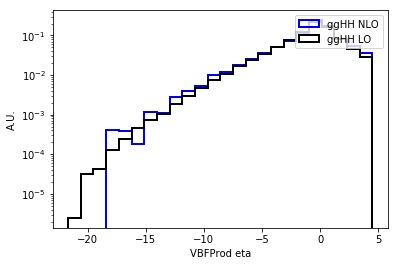

VBFJet_mjj


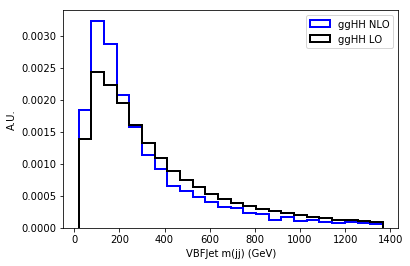

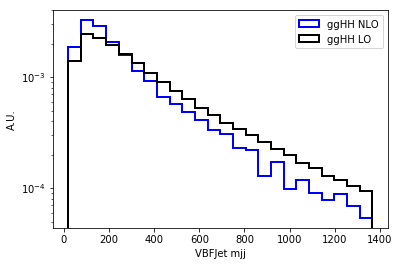

VBFJet_Delta_eta


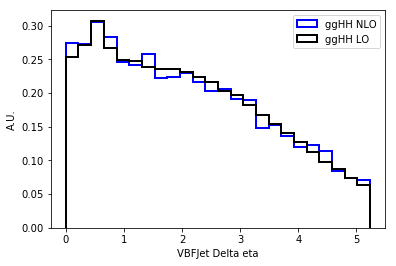

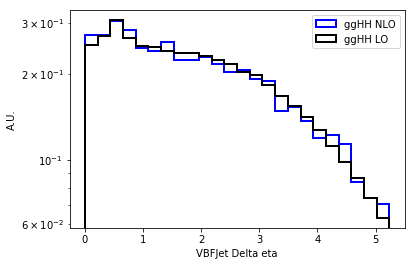

VBFleadJet_QGL


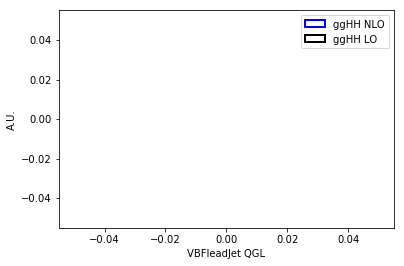

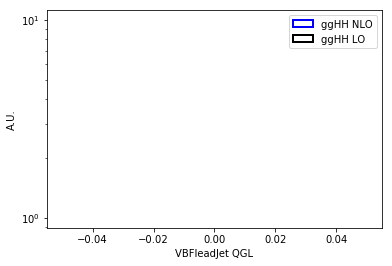

VBFsubleadJet_QGL


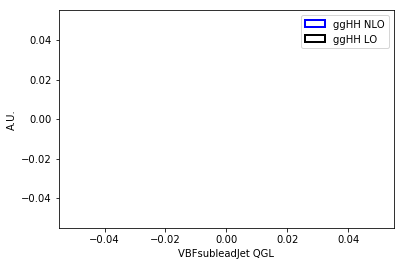

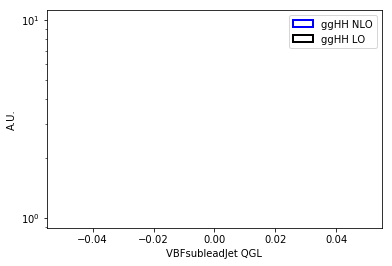

diHiggs_pt


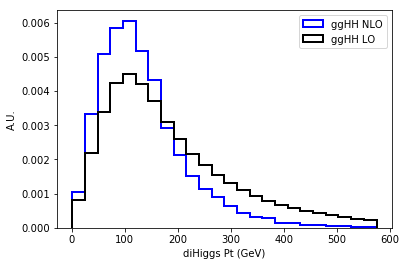

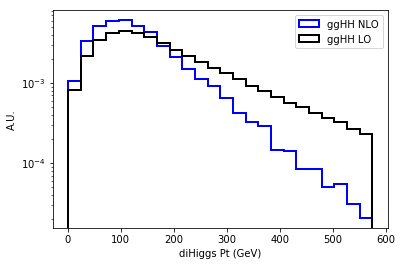

MX


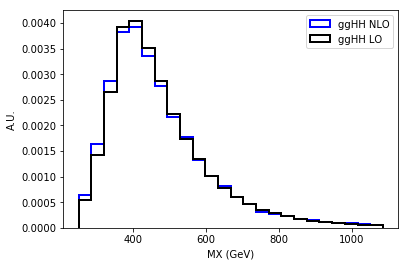

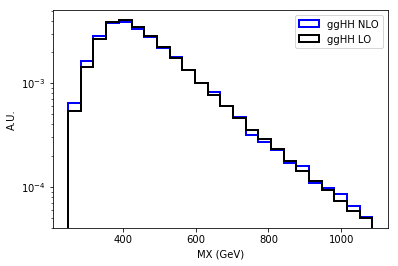

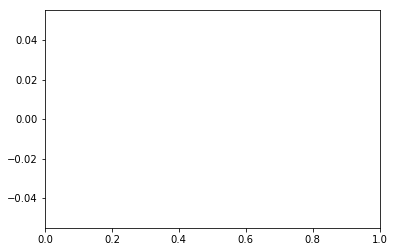

In [33]:
#plotting routine
numbins=25
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    feat=feat.replace('noexpand:','')
    #set the same range
    nbins = np.linspace(min(df_ggHH_LO[feat]), np.quantile(df_ggHH_LO[feat],0.95) , numbins)
     
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO[feat],label='ggHH NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_LO[feat],label='ggHH LO',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'],linewidth=2.0)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO[feat],label='ggHH NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_LO[feat],label='ggHH LO',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'],linewidth=2.0)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png"))


    plt.show()
    plt.yscale('linear')


## Test of new VBF HH sample : new VBF HH 2016 vs old 2018 

In [7]:
year='2018'


indir = '/work/nchernya/HHbbgg_ETH_devel/root_files/new_vbfhh_samples/'
indir2='/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'

file_ggHH_NLO_2018 = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_NLO_2016 = 'output_VBFHHTo2B2G_CV_1_C2V_0_C3_1_dipoleRecoilOff-TuneCUETP8M1_PSweights_13TeV-madgraph-pythia8.root'

process_ggHH_NLO_2018 = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV_madgraph_pythia8_13TeV_VBFDoubleHTag_0'
process_ggHH_NLO_2016 = 'vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0'


features = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
out_dir = indir+'plots_test/'

df_ggHH_NLO_2016 = load_data_rpd(indir+file_ggHH_NLO_2016, features, process_ggHH_NLO_2016,'tagsDumper/trees/','MX>0') 
df_ggHH_NLO_2018 = load_data_rpd(indir2+file_ggHH_NLO_2018, features, process_ggHH_NLO_2018,'tagsDumper/trees/','MX>0') 


Entries in ntuple:
706252
Entries in ntuple:
55998


HHbbggMVA


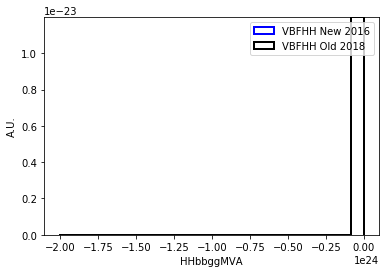

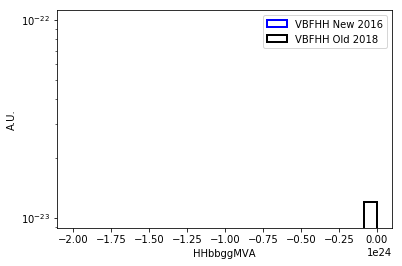

leadingJet_DeepFlavour


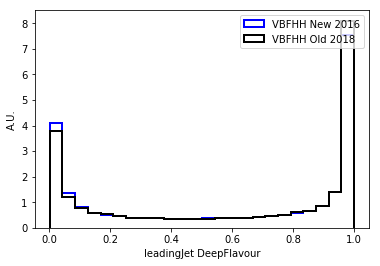

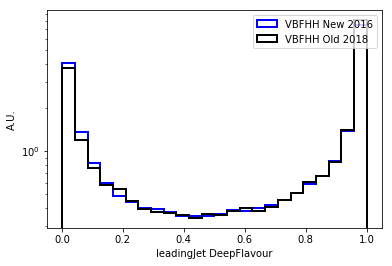

subleadingJet_DeepFlavour


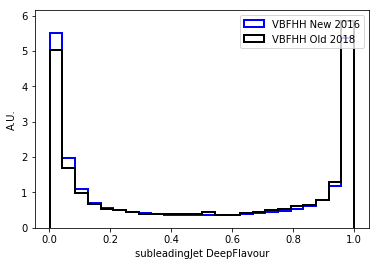

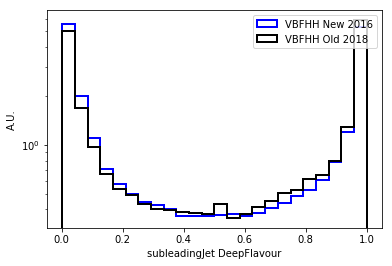

absCosThetaStar_CS


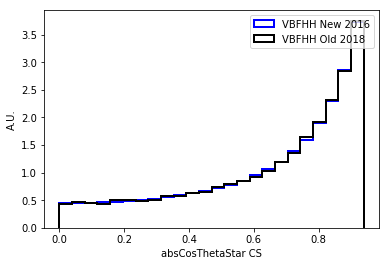

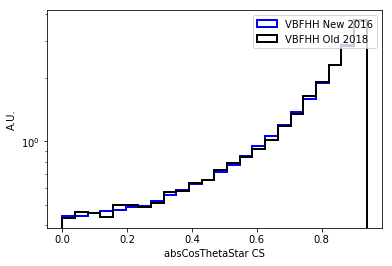

absCosTheta_bb


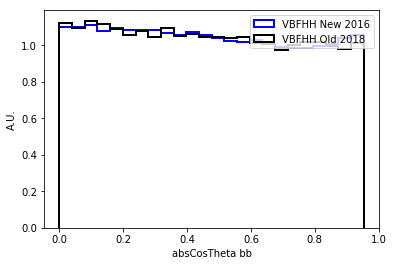

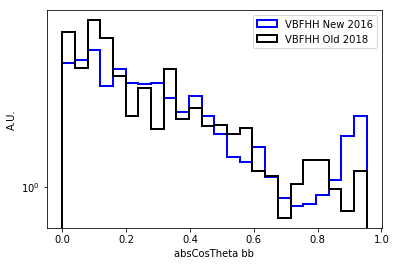

absCosTheta_gg


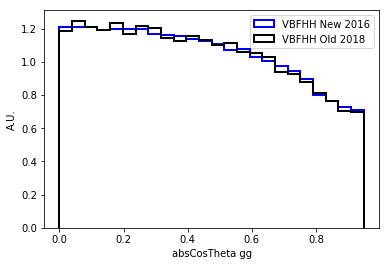

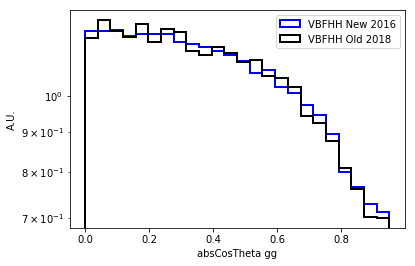

diphotonCandidatePtOverdiHiggsM


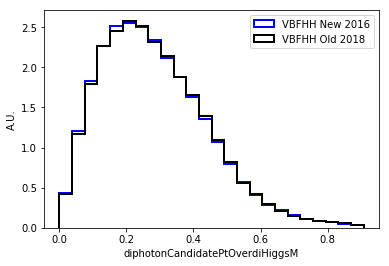

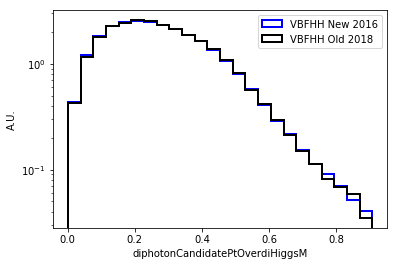

dijetCandidatePtOverdiHiggsM


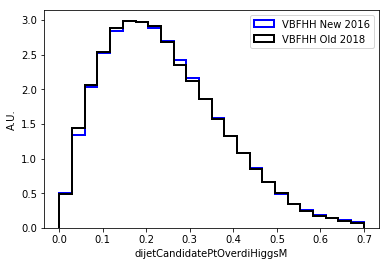

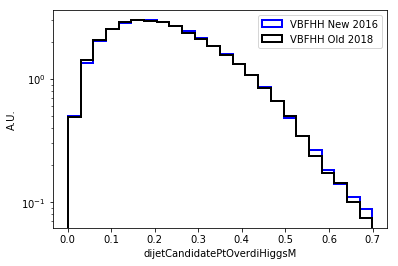

customLeadingPhotonIDMVA


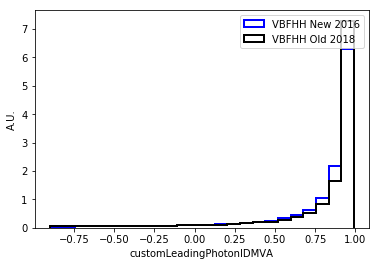

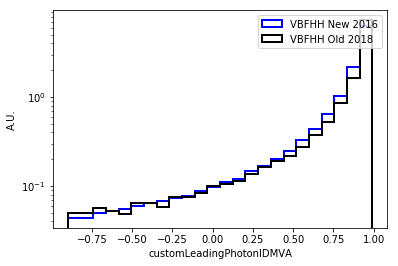

customSubLeadingPhotonIDMVA


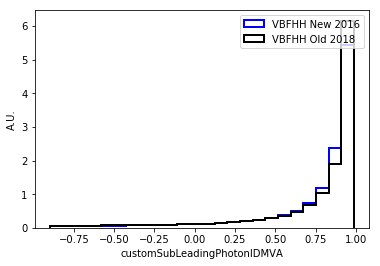

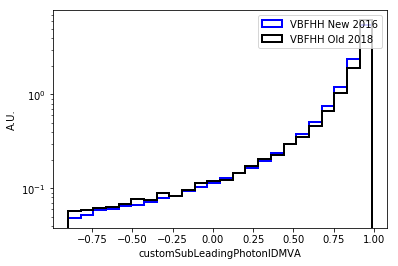

leadingPhotonSigOverE


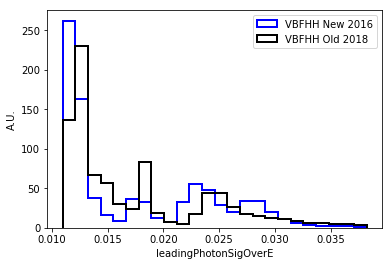

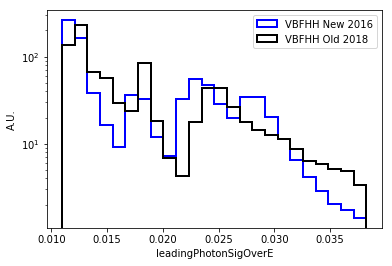

subleadingPhotonSigOverE


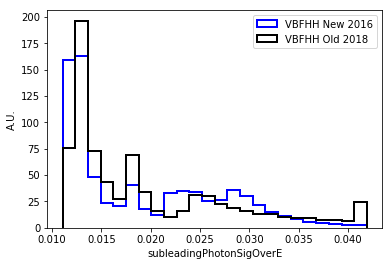

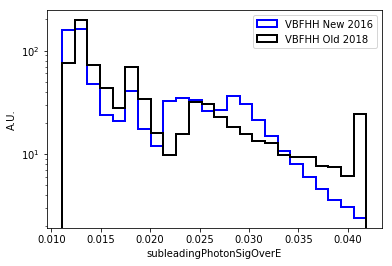

sigmaMOverM


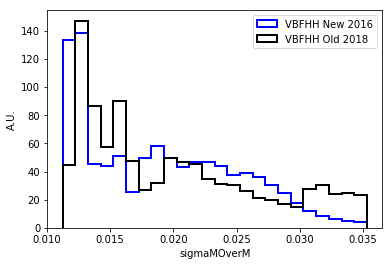

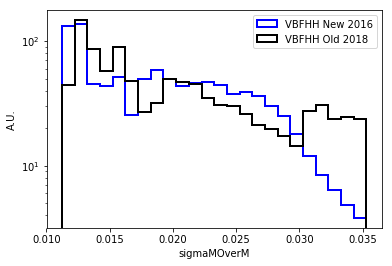

noexpand:(leadingPhoton_pt/CMS_hgg_mass)


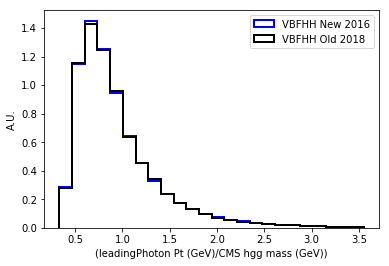

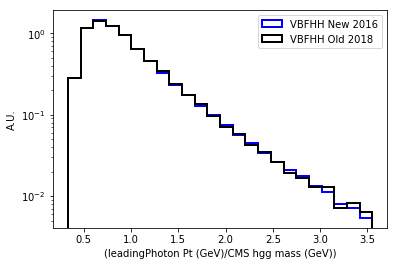

noexpand:(subleadingPhoton_pt/CMS_hgg_mass)


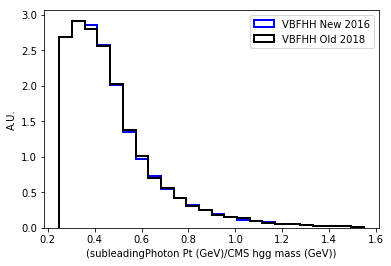

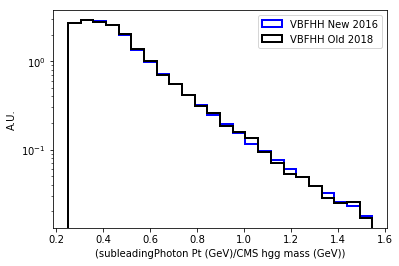

noexpand:(leadingJet_pt/Mjj)


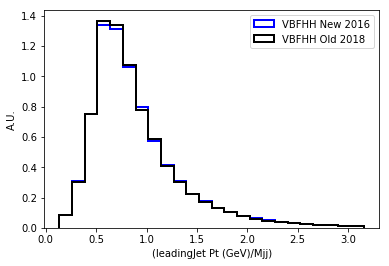

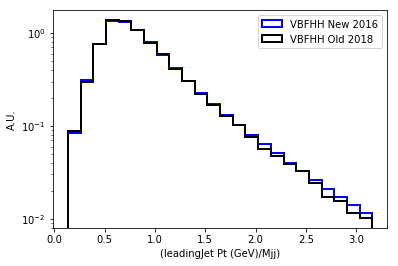

noexpand:(subleadingJet_pt/Mjj)


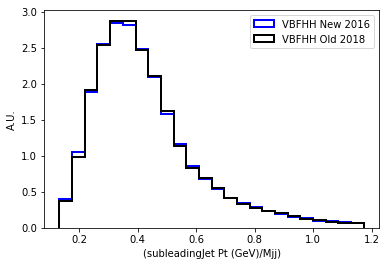

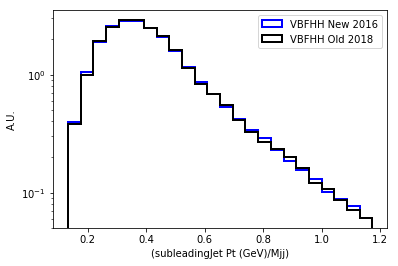

rho


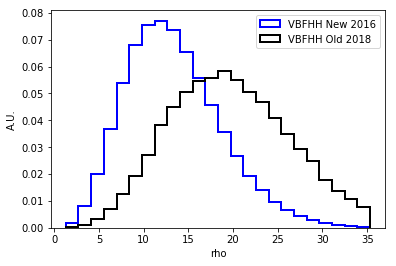

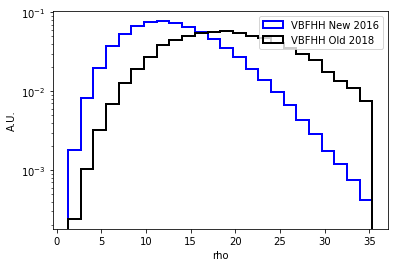

noexpand:(leadingJet_bRegNNResolution*1.4826)


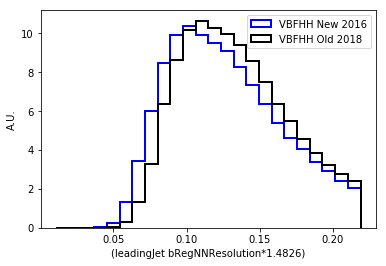

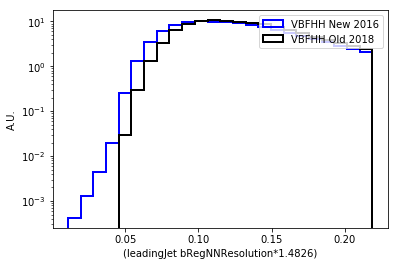

noexpand:(subleadingJet_bRegNNResolution*1.4826)


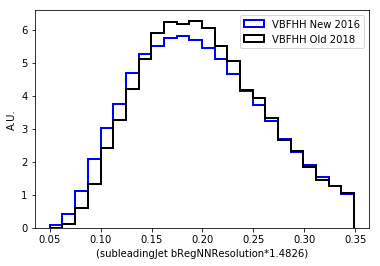

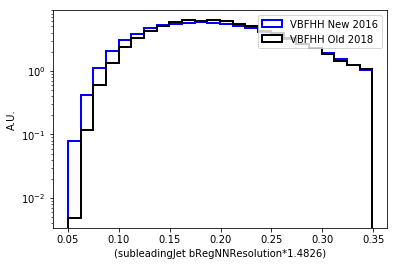

noexpand:(sigmaMJets*1.4826)


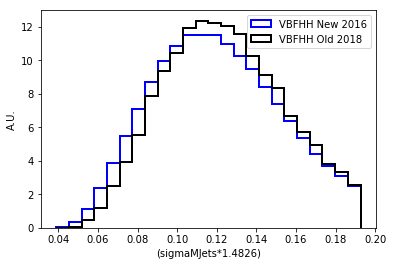

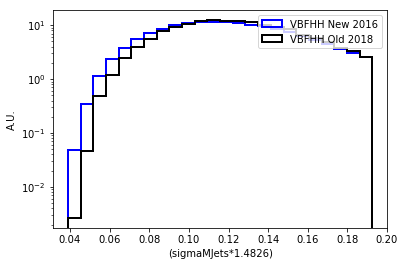

PhoJetMinDr


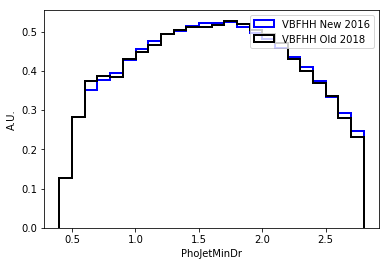

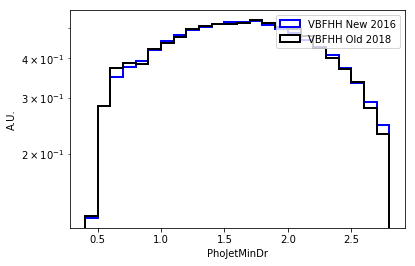

PhoJetOtherDr


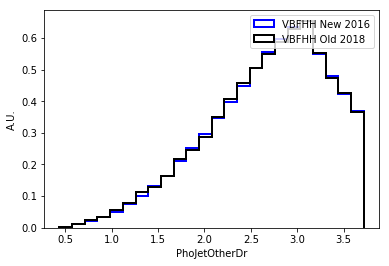

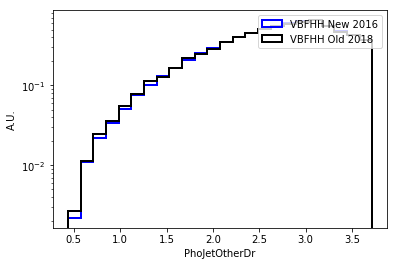

noexpand:(VBFleadJet_pt/VBFJet_mjj)


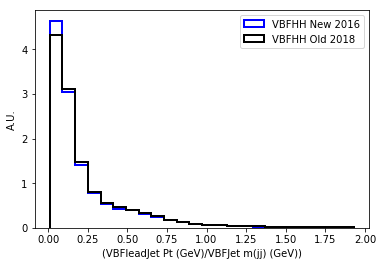

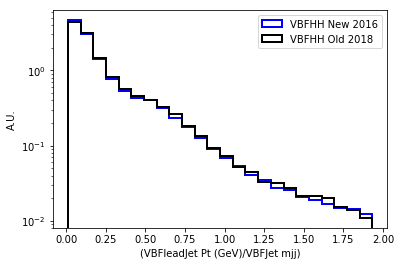

VBFleadJet_eta


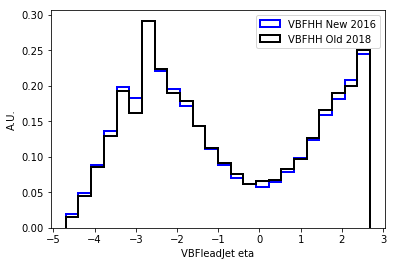

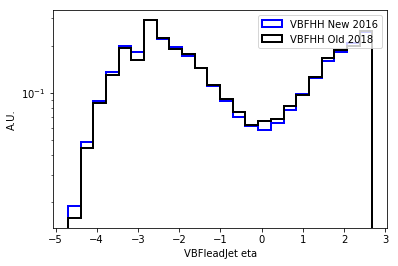

noexpand:(VBFsubleadJet_pt/VBFJet_mjj)


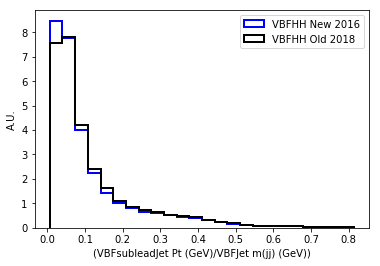

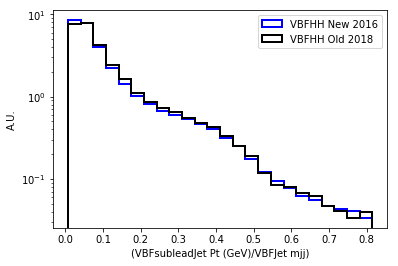

VBFsubleadJet_eta


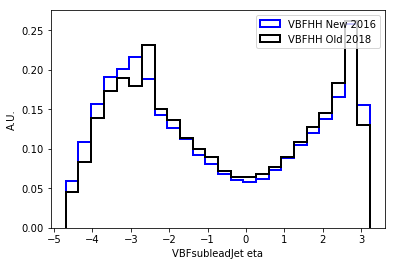

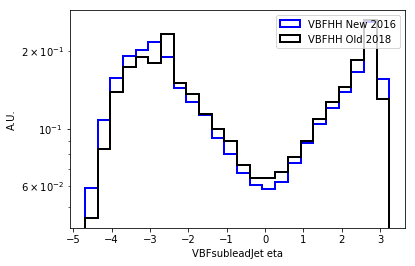

VBFCentrality_jg


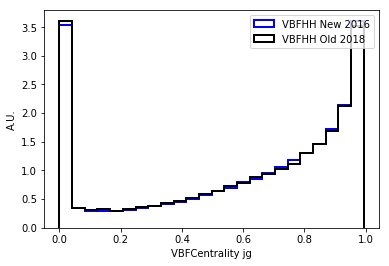

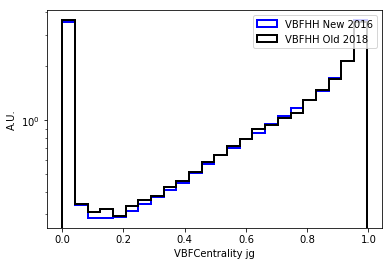

VBFCentrality_jb


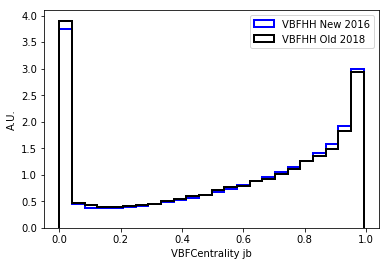

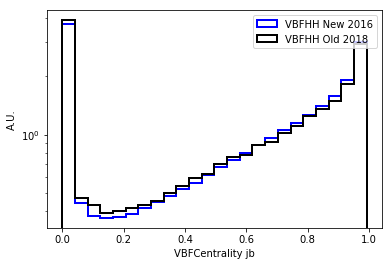

VBFDeltaR_jg


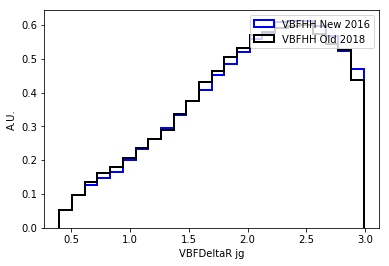

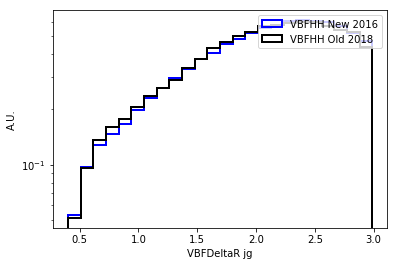

VBFDeltaR_jb


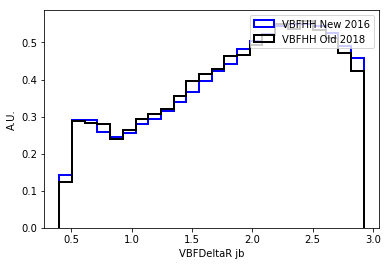

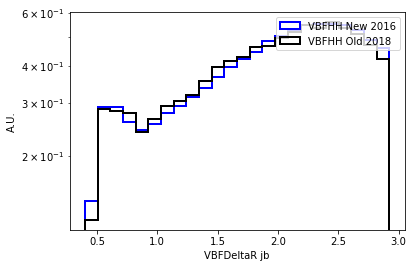

VBFProd_eta


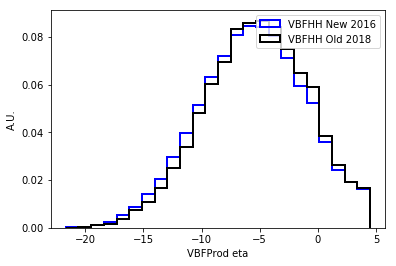

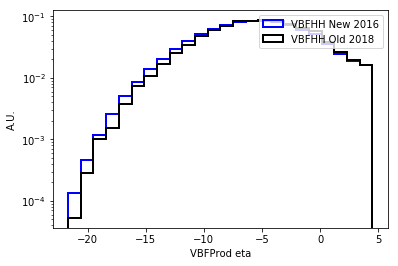

VBFJet_mjj


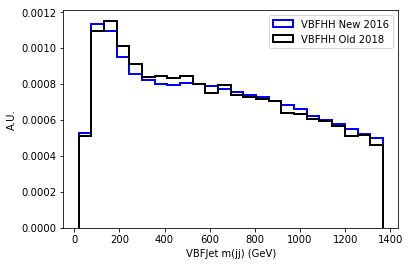

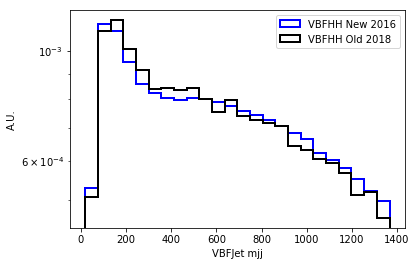

VBFJet_Delta_eta


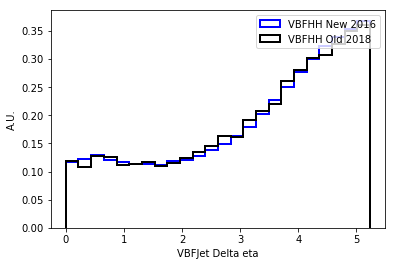

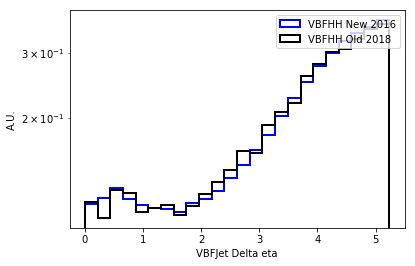

VBFleadJet_QGL


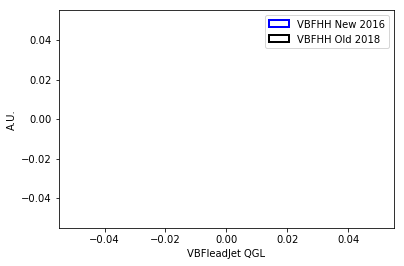

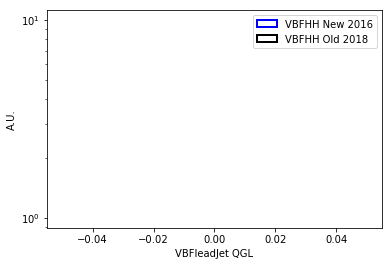

VBFsubleadJet_QGL


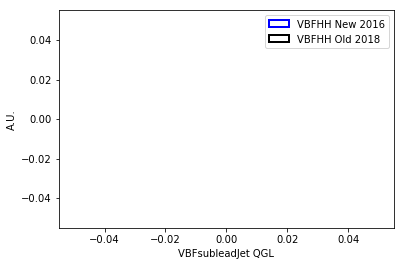

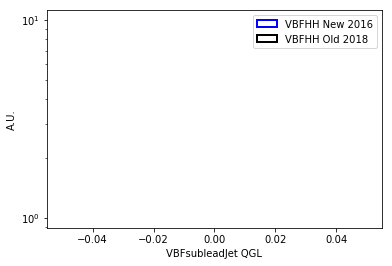

diHiggs_pt


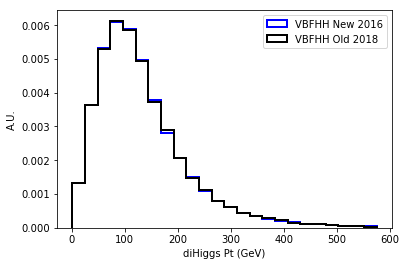

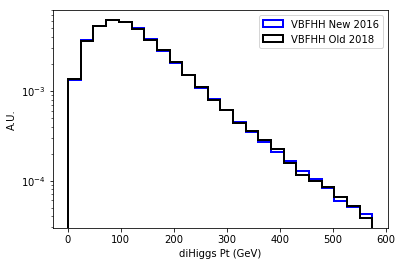

MX


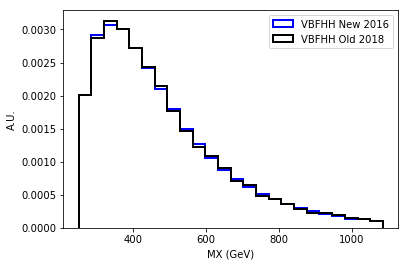

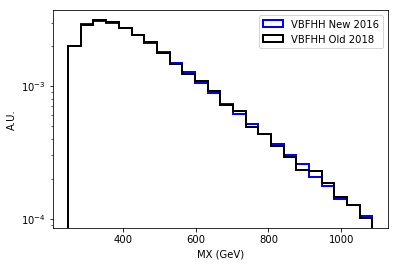

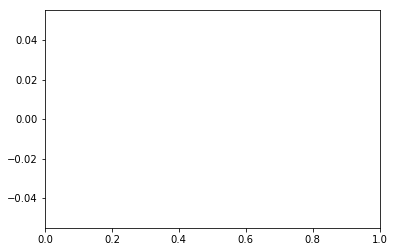

In [62]:
#plotting routine
numbins=25
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    feat=feat.replace('noexpand:','')
    #set the same range
    nbins = np.linspace(min(df_ggHH_LO[feat]), np.quantile(df_ggHH_LO[feat],0.95) , numbins)
     
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO_2016[feat],label='VBFHH New 2016',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO_2016['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_NLO_2018[feat],label='VBFHH Old 2018',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_NLO_2018['weight'],linewidth=2.0)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_ggHH_NLO_2016[feat],label='VBFHH New 2016',histtype='step',bins=nbins,color='blue',density='True',weights=df_ggHH_NLO_2016['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_ggHH_NLO_2018[feat],label='VBFHH Old 2018',histtype='step',bins=nbins,color='black',density='True',weights=df_ggHH_NLO_2018['weight'],linewidth=2.0)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png"))


    plt.show()
    plt.yscale('linear')


In [46]:
plt.hist(df_ggHH_NLO_2016['VBFleadJet_QGL'],df_ggHH_NLO_2016['weight'])

SyntaxError: non-keyword arg after keyword arg (<ipython-input-46-676a889bd86c>, line 1)

In [66]:
sum(df_ggHH_NLO_2016['VBFleadJet_QGL'])

nan

In [3]:
def check_for_nan(df,branch_name='event'):
    print df.isnull().sum()
    index = df[branch_name].index[df[branch_name].apply(np.isnan)]
    print 'event numbers for nan events : ', df['weight'][index]
    new_df = df.drop(df.index[index])
    return new_df


    
def drop_from_df(df,index):
    return df.drop(df.index[index])

def drop_nan(df):
    return df.dropna()

def clean_nan(df):
    df = df.dropna()
    return 

In [61]:
df_ggHH_NLO_2018 = drop_nan(df_ggHH_NLO_2018)
clean_nan(df_ggHH_NLO_2016)

In [67]:
sum(df_ggHH_NLO_2016['VBFsubleadJet_QGL'])

nan

In [68]:
check_for_nan(df_ggHH_NLO_2016,'VBFsubleadJet_QGL')

HHbbggMVA                                   0
weight                                      0
leadingJet_DeepFlavour                      0
subleadingJet_DeepFlavour                   0
absCosThetaStar_CS                          0
absCosTheta_bb                              0
absCosTheta_gg                              0
diphotonCandidatePtOverdiHiggsM             0
dijetCandidatePtOverdiHiggsM                0
customLeadingPhotonIDMVA                    0
customSubLeadingPhotonIDMVA                 0
leadingPhotonSigOverE                       0
subleadingPhotonSigOverE                    0
sigmaMOverM                                 0
rho                                         0
PhoJetMinDr                                 0
PhoJetOtherDr                               0
VBFleadJet_eta                              0
VBFsubleadJet_eta                           0
VBFCentrality_jg                            0
VBFCentrality_jb                            0
VBFDeltaR_jg                      

,HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,...,MX,(leadingPhoton_pt/CMS_hgg_mass),(subleadingPhoton_pt/CMS_hgg_mass),(leadingJet_pt/Mjj),(subleadingJet_pt/Mjj),(leadingJet_bRegNNResolution*1.4826),(subleadingJet_bRegNNResolution*1.4826),(sigmaMJets*1.4826),(VBFleadJet_pt/VBFJet_mjj),(VBFsubleadJet_pt/VBFJet_mjj)
0,-0.001297,2.931193e-07,0.970516,0.846082,0.692494,0.736281,0.730587,0.256508,0.460551,0.898834,...,380.181091,0.498662,0.476003,1.157900,0.408405,0.189137,0.169730,0.127237,0.078209,0.029697
1,0.022058,1.839730e-07,0.990787,0.023861,0.994653,0.131034,0.253144,0.059233,0.096894,-0.681347,...,795.785339,0.608132,0.451062,0.643219,0.648673,0.093634,0.204519,0.112487,0.736185,0.297931
2,0.290148,3.434076e-07,0.261892,0.015676,0.868615,0.075705,0.999133,0.347327,0.097262,0.516329,...,421.446625,0.568388,0.450989,0.628332,0.466739,0.271930,0.265364,0.189986,0.141247,0.054329
3,0.033656,2.723524e-07,0.689002,0.939514,0.981830,0.236064,0.289019,0.089895,0.182426,0.019974,...,590.988159,0.747132,0.338513,0.867606,0.447365,0.134858,0.183333,0.113442,0.784929,0.379642
4,-0.000475,3.280887e-07,0.438629,0.030426,0.976700,0.331308,0.859505,0.138320,0.028602,0.946091,...,379.514404,0.397776,0.259502,0.491920,0.434884,0.148050,0.135983,0.100515,0.070065,0.030887
5,-0.005706,2.160842e-07,0.989225,0.086664,0.998603,0.093114,0.776774,0.125215,0.085007,0.789089,...,986.910828,0.840161,0.389800,0.832073,0.289472,0.131069,0.357953,0.189250,0.749876,0.225042
6,0.019610,2.587769e-07,0.993320,0.998002,0.852688,0.438582,0.484589,0.204845,0.295561,0.808244,...,447.333954,0.623587,0.527237,0.874318,0.422768,0.100232,0.164349,0.096034,0.048938,0.047655
7,0.237644,1.165795e-08,0.986313,0.985032,0.933929,0.651145,0.342456,0.157264,0.282970,-0.064844,...,530.115479,0.869533,0.319534,1.146948,0.383694,0.103501,0.172947,0.099644,0.073759,0.061173
8,0.007847,3.136743e-07,0.981489,0.036018,0.236093,0.488790,0.498449,0.289062,0.831919,0.180408,...,571.582031,0.741355,0.705876,4.495877,0.296144,0.108691,0.289249,0.126485,0.222694,0.100004
9,-0.005936,3.059984e-07,0.877699,0.023217,0.752574,0.871092,0.580321,0.382619,0.187086,0.945218,...,343.685852,0.678743,0.513888,0.528583,0.339897,0.339435,0.229578,0.205122,0.121714,0.049264


In [69]:
test = drop_nan(df_ggHH_NLO_2016)

In [70]:
check_for_nan(test,'VBFsubleadJet_QGL')

HHbbggMVA                                  0
weight                                     0
leadingJet_DeepFlavour                     0
subleadingJet_DeepFlavour                  0
absCosThetaStar_CS                         0
absCosTheta_bb                             0
absCosTheta_gg                             0
diphotonCandidatePtOverdiHiggsM            0
dijetCandidatePtOverdiHiggsM               0
customLeadingPhotonIDMVA                   0
customSubLeadingPhotonIDMVA                0
leadingPhotonSigOverE                      0
subleadingPhotonSigOverE                   0
sigmaMOverM                                0
rho                                        0
PhoJetMinDr                                0
PhoJetOtherDr                              0
VBFleadJet_eta                             0
VBFsubleadJet_eta                          0
VBFCentrality_jg                           0
VBFCentrality_jb                           0
VBFDeltaR_jg                               0
VBFDeltaR_

,HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,...,MX,(leadingPhoton_pt/CMS_hgg_mass),(subleadingPhoton_pt/CMS_hgg_mass),(leadingJet_pt/Mjj),(subleadingJet_pt/Mjj),(leadingJet_bRegNNResolution*1.4826),(subleadingJet_bRegNNResolution*1.4826),(sigmaMJets*1.4826),(VBFleadJet_pt/VBFJet_mjj),(VBFsubleadJet_pt/VBFJet_mjj)
0,-0.001297,2.931193e-07,0.970516,0.846082,0.692494,0.736281,0.730587,0.256508,0.460551,0.898834,...,380.181091,0.498662,0.476003,1.157900,0.408405,0.189137,0.169730,0.127237,0.078209,0.029697
1,0.022058,1.839730e-07,0.990787,0.023861,0.994653,0.131034,0.253144,0.059233,0.096894,-0.681347,...,795.785339,0.608132,0.451062,0.643219,0.648673,0.093634,0.204519,0.112487,0.736185,0.297931
2,0.290148,3.434076e-07,0.261892,0.015676,0.868615,0.075705,0.999133,0.347327,0.097262,0.516329,...,421.446625,0.568388,0.450989,0.628332,0.466739,0.271930,0.265364,0.189986,0.141247,0.054329
3,0.033656,2.723524e-07,0.689002,0.939514,0.981830,0.236064,0.289019,0.089895,0.182426,0.019974,...,590.988159,0.747132,0.338513,0.867606,0.447365,0.134858,0.183333,0.113442,0.784929,0.379642
4,-0.000475,3.280887e-07,0.438629,0.030426,0.976700,0.331308,0.859505,0.138320,0.028602,0.946091,...,379.514404,0.397776,0.259502,0.491920,0.434884,0.148050,0.135983,0.100515,0.070065,0.030887
5,-0.005706,2.160842e-07,0.989225,0.086664,0.998603,0.093114,0.776774,0.125215,0.085007,0.789089,...,986.910828,0.840161,0.389800,0.832073,0.289472,0.131069,0.357953,0.189250,0.749876,0.225042
6,0.019610,2.587769e-07,0.993320,0.998002,0.852688,0.438582,0.484589,0.204845,0.295561,0.808244,...,447.333954,0.623587,0.527237,0.874318,0.422768,0.100232,0.164349,0.096034,0.048938,0.047655
7,0.237644,1.165795e-08,0.986313,0.985032,0.933929,0.651145,0.342456,0.157264,0.282970,-0.064844,...,530.115479,0.869533,0.319534,1.146948,0.383694,0.103501,0.172947,0.099644,0.073759,0.061173
8,0.007847,3.136743e-07,0.981489,0.036018,0.236093,0.488790,0.498449,0.289062,0.831919,0.180408,...,571.582031,0.741355,0.705876,4.495877,0.296144,0.108691,0.289249,0.126485,0.222694,0.100004
9,-0.005936,3.059984e-07,0.877699,0.023217,0.752574,0.871092,0.580321,0.382619,0.187086,0.945218,...,343.685852,0.678743,0.513888,0.528583,0.339897,0.339435,0.229578,0.205122,0.121714,0.049264


(array([  3257.,      0.,      0.,      0.,      0., 114665.,  74347.,
         74467.,  92268., 159260.]),
 array([-1.0000000e+00, -8.0000001e-01, -6.0000002e-01, -4.0000004e-01,
        -2.0000005e-01, -5.9604645e-08,  1.9999993e-01,  3.9999992e-01,
         5.9999990e-01,  7.9999989e-01,  9.9999988e-01], dtype=float32),
 <a list of 10 Patch objects>)

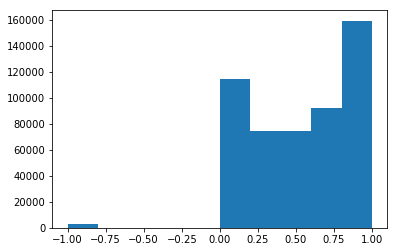

In [71]:
plt.hist(test['VBFsubleadJet_QGL'])

## ttHScore optimization

In [18]:
labels=[]
outstr = "30_04_2020_ttHScore_opt"
labels.append(outstr)
utils.IO.plotFolder = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/%s/'%outstr
if not os.path.exists(utils.IO.plotFolder):
    print utils.IO.plotFolder, "doesn't exist, creating it..."
    os.makedirs(utils.IO.plotFolder)

/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/30_04_2020_ttHScore_opt/ doesn't exist, creating it...


In [24]:
vbf_dataframe_list = []
#kl_list = [1,-2.,8,1.]
kl_list = [1,0]


year='2016'
year_dict = {}
year_dict['2016'] = 0

features = 'HHbbggMVA,weight,ttHScore,MX'.split(',')
out_dir = indir+'plots_ggHH_LOreweighting/'


ntuples = '' 
couplings = 'CV_1_C2V_1_C3_1,CV_1_C2V_2_C3_1,CV_1_C2V_1_C3_2,CV_1_C2V_1_C3_0,CV_0_5_C2V_1_C3_1,CV_1_5_C2V_1_C3_1'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_VBFHHTo2B2G_%s_dipoleRecoilOff-TuneCUETP8M1_PSweights_13TeV-madgraph-pythia8.root'%coup)
signal_name = 'vbfhh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year

for ikl,kl in enumerate(kl_list) :
    import training_utils as utils
    reload(utils)
    utils.IO.ldata = '/work/nchernya/HHbbgg_ETH_devel/root_files/new_vbfhh_samples/'
    utils.IO.reweightVBFHH = True
    utils.IO.vbfhh_cv = [1.]  
    utils.IO.vbfhh_c2v = [kl]
    utils.IO.vbfhh_kl = [1.]
    #if ikl==len(kl_list)-1 : utils.IO.vbfhh_c2v = [0.]
    #utils.IO.vbfhh_kl = [kl]
    for sig in signal:
        utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])
    cuts='MX>0'
    preprocessing.set_signals(features,True,cuts)
    vbf_dataframe_list.append(copy.deepcopy(utils.IO.signal_df[0]))


using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2016_13TeV_125_13TeV_VBFDoubleHTag_0


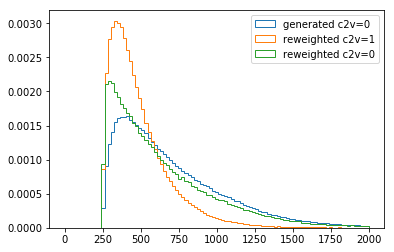

In [25]:
_,bins,_ = plt.hist(df_ggHH_NLO_2016['MX'],weights=df_ggHH_NLO_2016['weight'],bins=np.linspace(0,2000,100),density=1,histtype='step',label='generated c2v=0')
_,_,_ = plt.hist(vbf_dataframe_list[0]['MX'],weights=vbf_dataframe_list[0]['weight'],bins=bins,density=1,histtype='step',label='reweighted c2v=1')
_,_,_ = plt.hist(vbf_dataframe_list[1]['MX'],weights=vbf_dataframe_list[1]['weight'],bins=bins,density=1,histtype='step',label='reweighted c2v=0')
plt.legend()



In [7]:
year='2018'


indir='/work/nchernya/HHbbgg_ETH_devel/root_files/vbfhh_preselection_wo_ttHkiller/'
indir2='/work/nchernya/HHbbgg_ETH_devel/root_files/gghh_2jets/'

file_VBFHH = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_Era2018_RR-17Sep2018_v2.root'
file_ggHH_LO = 'GluGluToHHTo2B2G_Era2018_RR-17Sep2018_v2.root'
file_ggHH_NLO = 'output_hh_nlo_kl_1_kt_1.root'
file_diphoton = 'output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root'
file_tth = 'output_tth_2018.root'


process_VBFHH = 'VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV_madgraph_pythia8_13TeV_VBFDoubleHTag_0'
process_ggHH_LO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_ggHH_NLO = 'hh2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_tth = 'tth2018_13TeV_125_13TeV_VBFDoubleHTag_0'
process_diphoton = 'DiPhotonJetsBox_MGG_80toInf_13TeV_Sherpa_13TeV_VBFDoubleHTag_0'


features='weight,ttHScore,CMS_hgg_mass,MX'.split(',')
out_dir = indir+'plots_ttHScore/'

df_VBFHH = load_data_rpd(indir2+file_VBFHH, features, process_VBFHH,'tagsDumper/trees/','MX>0') 
df_ggHH_LO = load_data_rpd(indir2+file_ggHH_LO, features+['benchmark_reweight_SM'], process_ggHH_LO,'tagsDumper/trees/','MX>0') 
df_ggHH_NLO = load_data_rpd(indir+file_ggHH_NLO, features+['genweight'], process_ggHH_NLO,'tagsDumper/trees/','(genweight<0.1)')
df_diphoton = load_data_rpd(indir+file_diphoton, features, process_diphoton,'tagsDumper/trees/','MX>0') 
df_tth = load_data_rpd(indir+file_tth, features, process_tth,'tagsDumper/trees/','MX>0') 


###########################




Entries in ntuple:
55998
Entries in ntuple:
482573
Entries in ntuple:
17219
Entries in ntuple:
102888
Entries in ntuple:
98878


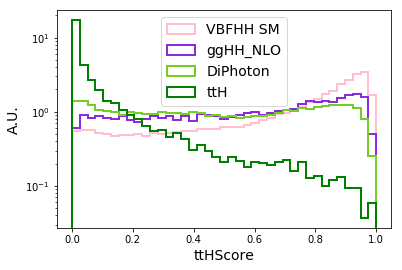

In [26]:
plt.yscale('log')
n, bins, patches = plt.hist(df_VBFHH['ttHScore'],color='pink', bins=np.linspace(0,1,40),weights=df_VBFHH['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
#_,_,_ = plt.hist(df_ggHH_LO['ttHScore'],color='violet', bins=bins,weights=df_ggHH_LO['weight']*df_ggHH_LO['benchmark_reweight_SM'], alpha=1.,normed=1,label='ggHH_LO',histtype='step')
_,_,_ = plt.hist(df_ggHH_NLO['ttHScore'],color='#8A2BE2', bins=bins,weights=df_ggHH_NLO['weight'], alpha=1.,normed=1,label='ggHH_NLO',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_diphoton['ttHScore'],color='#76cd26', bins=bins,weights=df_diphoton['weight'], alpha=1.,normed=1,label='DiPhoton',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_tth['ttHScore'],color='g', bins=bins,weights=df_tth['weight'], alpha=1.,normed=1,label='ttH',histtype='step',linewidth=2)

plt.xlabel('ttHScore', fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper center', fontsize=14)
plt.savefig(utils.IO.plotFolder+"ttH_SMVBFHH.png")
plt.show()

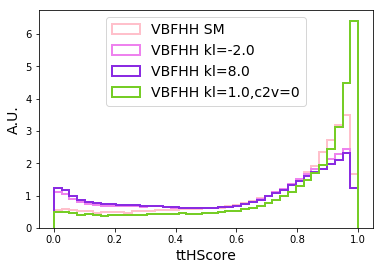

In [24]:
#plt.yscale('log')
colors = 'pink,violet,#8A2BE2,#76cd26,blue'.split(',')
n, bins, patches = plt.hist(df_VBFHH['ttHScore'],color='pink', bins=np.linspace(0,1,40),weights=df_VBFHH['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
for i in range(1,len(vbf_dataframe_list)):
    label='kl=%.1f'%kl_list[i]
    if i==len(kl_list)-1 : label='kl=%.1f,c2v=0'%kl_list[i]
    _,_,_ = plt.hist(vbf_dataframe_list[i]['ttHScore'],color=colors[i], bins=bins,weights=vbf_dataframe_list[i]['weight'], alpha=1.,normed=1,label='VBFHH '+label,histtype='step',linewidth=2)


plt.xlabel('ttHScore', fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper center', fontsize=14)
plt.savefig(utils.IO.plotFolder+"ttH_VBFHH_kl.png")
plt.show()

In [64]:
yields_vbfHH = []
yields_vbfHH_kl = dict()
yields_ggHH = []
yields_bkg_fullmass = []
yields_bkg = []
yields_singleH = []
mgg_cut = '(CMS_hgg_mass>115)&(CMS_hgg_mass<135)'
for i in range(0,len(vbf_dataframe_list)):
    yields_vbfHH_kl[i] = []
for cut in np.linspace(0., 1.0, 200):
    yields_vbfHH.append(sum(df_VBFHH.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight']))
    yields_ggHH.append(sum(df_ggHH_NLO.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_bkg_fullmass.append(sum(df_diphoton.query('(ttHScore>%s)'%cut)['weight'])) 
    yields_bkg.append(sum(df_diphoton.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_singleH.append(sum(df_tth.query(mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    for i in range(0,len(vbf_dataframe_list)):
        yields_vbfHH_kl[i].append(sum(vbf_dataframe_list[i].query(mgg_cut+'&(ttHScore>%s)'%cut)['weight']))

In [65]:
sign = []
power = []
sign_kl = dict()
for ikl in range(0,len(vbf_dataframe_list)):
    sign_kl[ikl] = []
for i in range(len(yields_vbfHH)):
    #if (yields_bkg_fullmass[i]>=6) : sign.append(yields_vbfHH[i]/np.sqrt(yields_singleH[i]+yields_bkg[i])) 
    #else : sign.append(0.)
    #sign.append(yields_vbfHH[i]/np.sqrt(yields_singleH[i])) 
    sign.append(yields_vbfHH[i]*100/np.sqrt(yields_singleH[i]+yields_bkg[i])) 
    power.append(yields_vbfHH[i]/np.sqrt(yields_singleH[i]+yields_bkg[i]+yields_vbfHH[i]))
    for ikl in range(0,len(vbf_dataframe_list)):
        sign_kl[ikl].append(yields_vbfHH_kl[ikl][i]*100/np.sqrt(yields_singleH[i]+yields_bkg[i])) 


/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


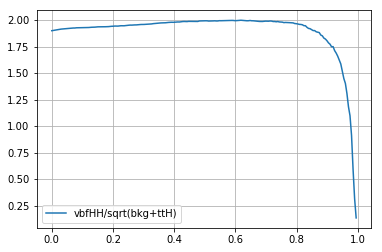

In [60]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization.png")

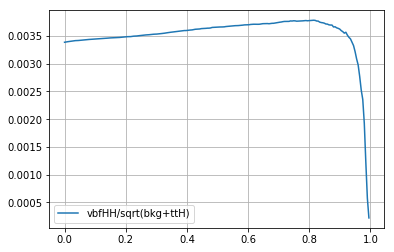

In [71]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[0], label="vbfHH/sqrt(bkg+ttH)")

#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

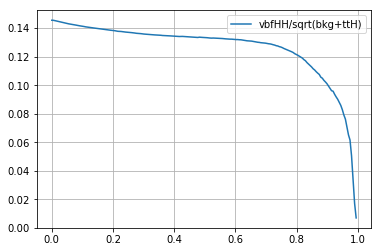

In [72]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[1], label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

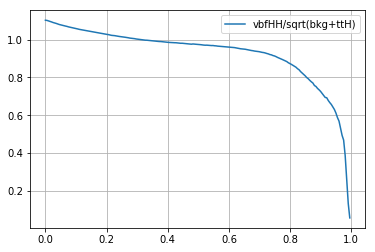

In [73]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[2], label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

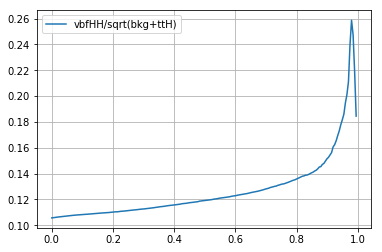

In [74]:
#plt.plot(np.linspace(0., 1.0, 200), sign, label="vbfHH/sqrt(ttH)")
plt.plot(np.linspace(0., 1.0, 200), sign_kl[3], label="vbfHH/sqrt(bkg+ttH)")
#plt.plot(np.linspace(0., 1.0, 200), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
plt.savefig(utils.IO.plotFolder+"ttHScore_SM_optimization_kl.png")

### Comparing Soumya's 2017 and 2018 diphotons

In [11]:
indir = '/work/nchernya/HHbbgg_ETH_devel/root_files/soumya_diphoton/'

file_2017 = 'output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2017.root'
file_2018 = 'output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa_2018.root'

process = 'DiPhotonJetsBox_MGG_80toInf_13TeV_Sherpa_13TeV_VBFDoubleHTag_0'
features = ['rho','event','ttHScore','HHbbggMVA','diHiggs_pt','diHiggs_mass','genMhh','MX','dijet_pt','dijet_eta','diphoton_pt','diphoton_eta','weight',
            'absCosThetaStar_CS','absCosTheta_bb','absCosTheta_gg','leadingPhoton_pt','leadingPhoton_eta',
            'subleadingPhoton_pt','subleadingPhoton_eta',
            'leadingJet_pt','leadingJet_eta','subleadingJet_eta','subleadingJet_pt','VBFleadJet_QGL','VBFsubleadJet_QGL']
features += 'VBFDelta_phi,VBFJet_mjj,VBFProd_eta,VBFJet_Delta_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFleadJet_pt,VBFleadJet_eta,VBFsubleadJet_pt,VBFsubleadJet_eta'.split(',')

#features = 'HHbbggMVA,weight,leadingJet_DeepFlavour,subleadingJet_DeepFlavour,absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,noexpand:(leadingPhoton_pt/CMS_hgg_mass),noexpand:(subleadingPhoton_pt/CMS_hgg_mass),noexpand:(leadingJet_pt/Mjj),noexpand:(subleadingJet_pt/Mjj),rho,noexpand:(leadingJet_bRegNNResolution*1.4826),noexpand:(subleadingJet_bRegNNResolution*1.4826),noexpand:(sigmaMJets*1.4826),PhoJetMinDr,PhoJetOtherDr,noexpand:(VBFleadJet_pt/VBFJet_mjj),VBFleadJet_eta,noexpand:(VBFsubleadJet_pt/VBFJet_mjj),VBFsubleadJet_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFProd_eta,VBFJet_mjj,VBFJet_Delta_eta,VBFleadJet_QGL,VBFsubleadJet_QGL,diHiggs_pt,MX'.split(",")
out_dir = indir+'plots_diphotons/'

df_2017 = load_data_rpd(indir+file_2017, features, process,'tagsDumper/trees/','(ttHScore>0.)')
df_2018 = load_data_rpd(indir+file_2018, features, process,'tagsDumper/trees/','(ttHScore>0.)') 

Entries in ntuple:
188183
Entries in ntuple:
102888


rho


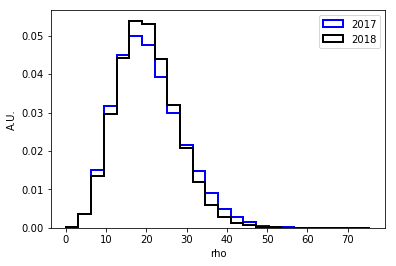

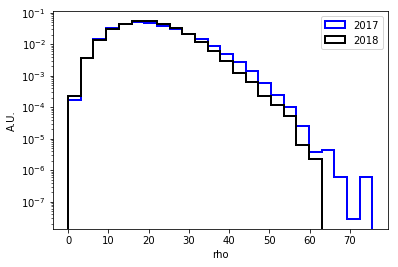

event


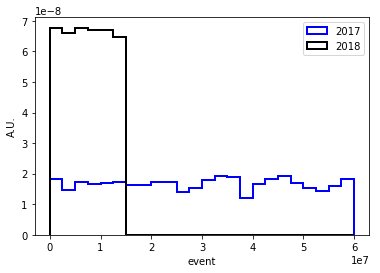

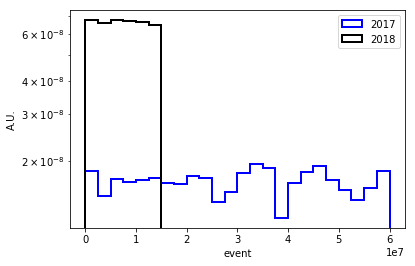

ttHScore


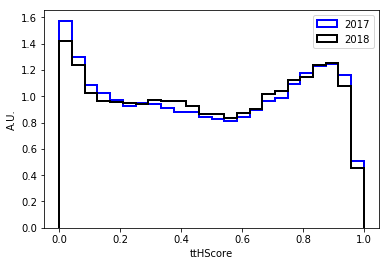

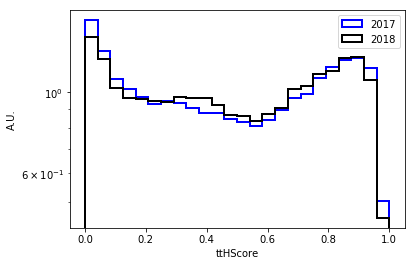

HHbbggMVA


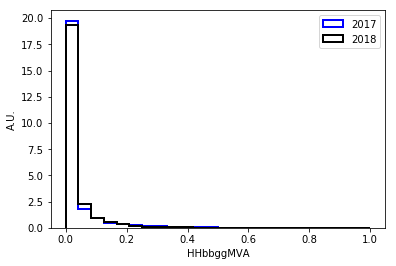

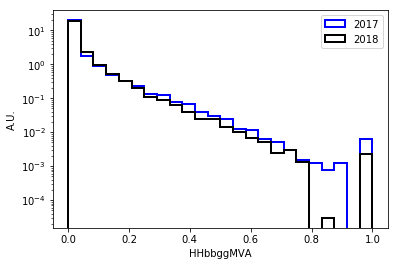

diHiggs_pt


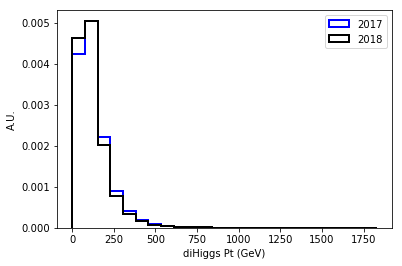

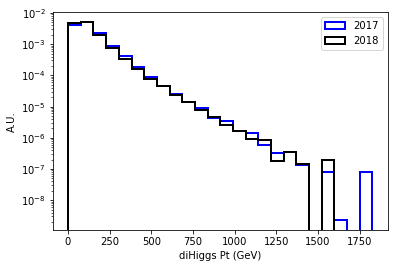

diHiggs_mass


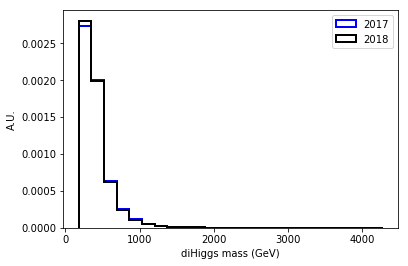

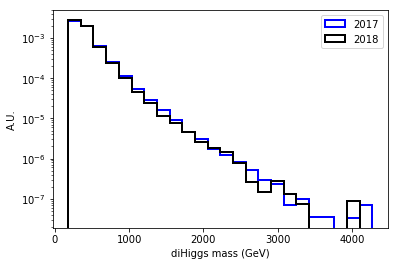

genMhh


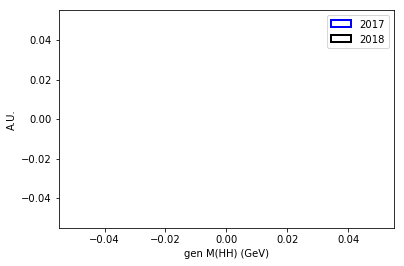

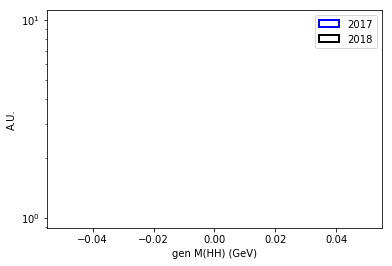

MX


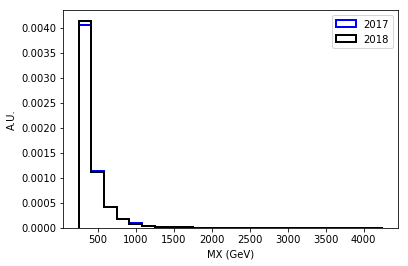

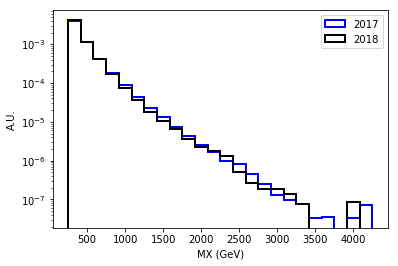

dijet_pt


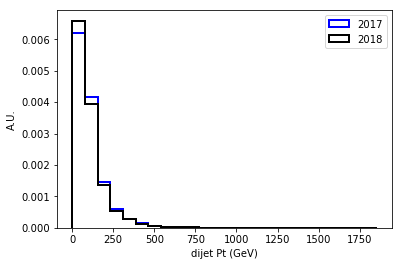

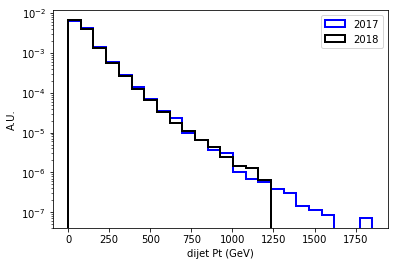

dijet_eta


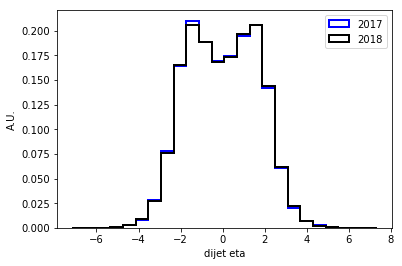

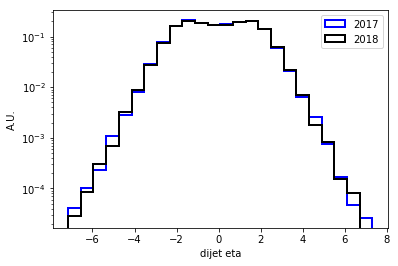

diphoton_pt


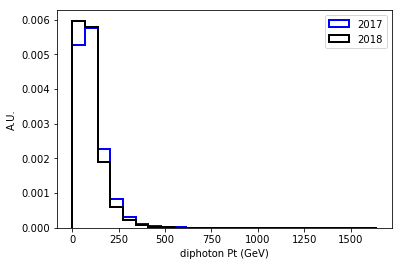

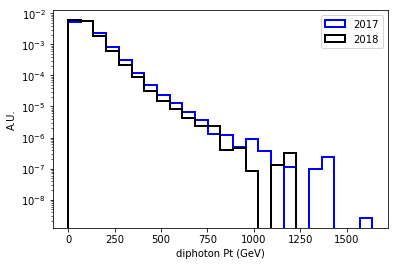

diphoton_eta


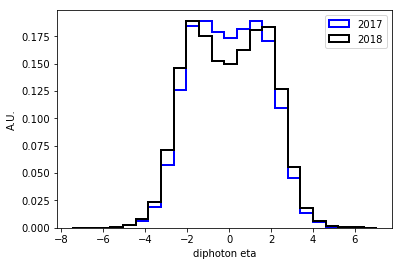

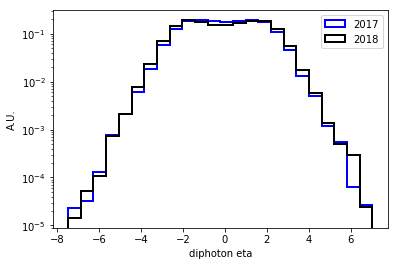

absCosThetaStar_CS


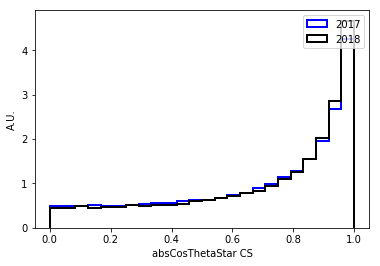

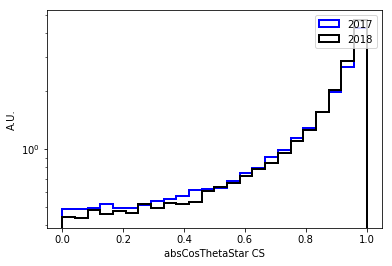

absCosTheta_bb


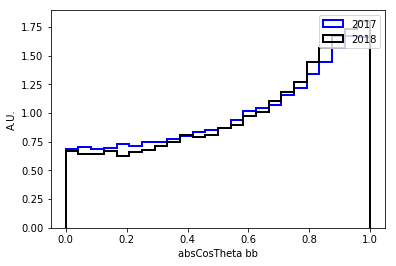

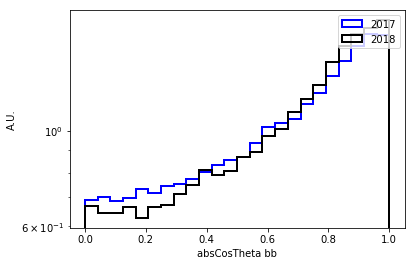

absCosTheta_gg


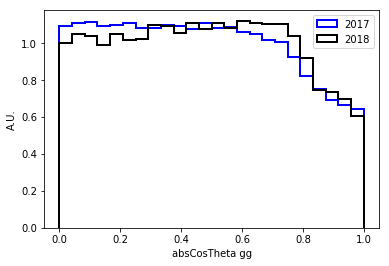

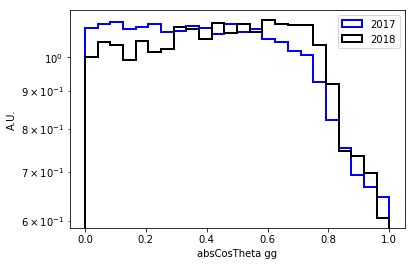

leadingPhoton_pt


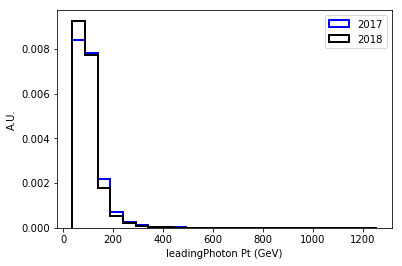

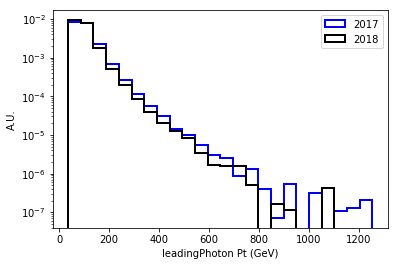

leadingPhoton_eta


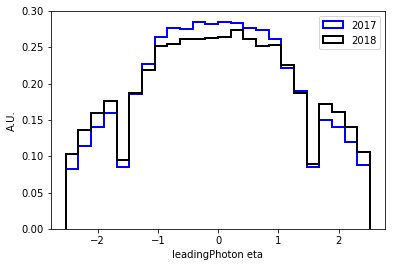

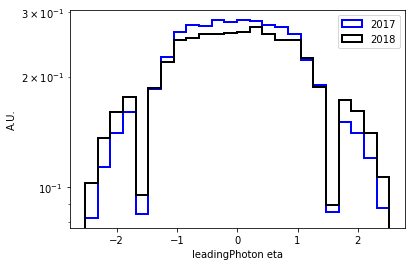

subleadingPhoton_pt


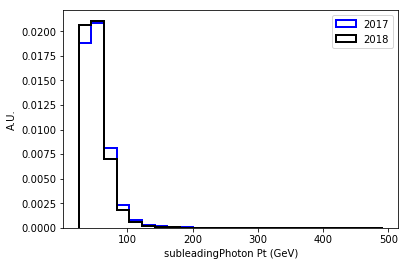

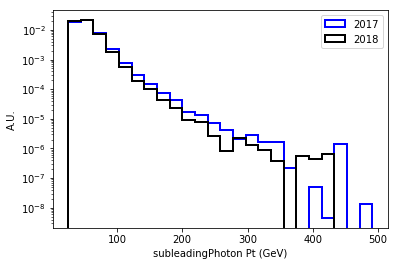

subleadingPhoton_eta


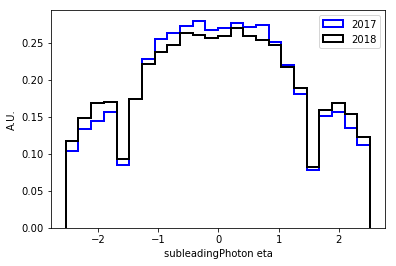

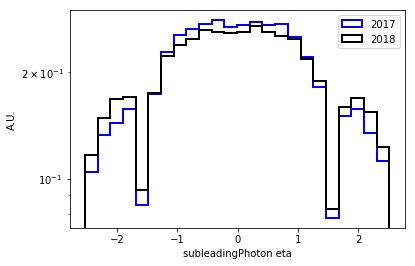

leadingJet_pt


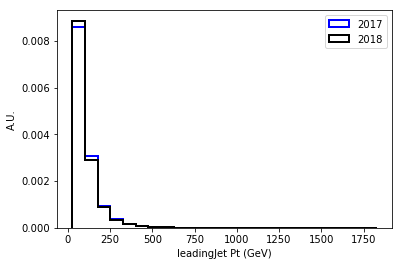

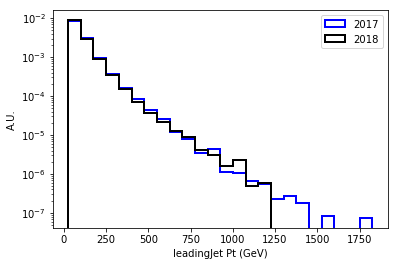

leadingJet_eta


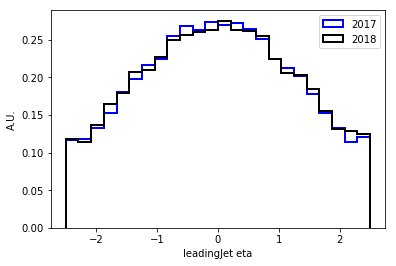

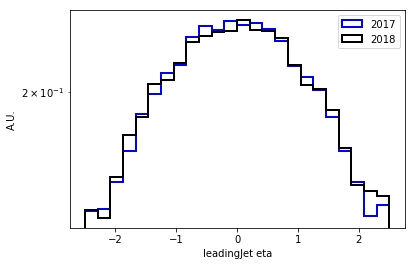

subleadingJet_eta


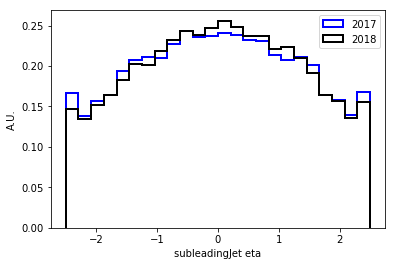

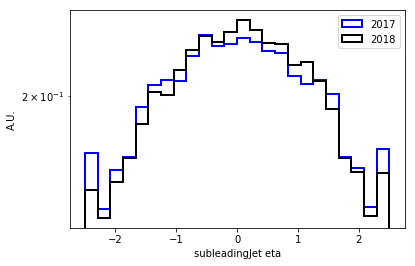

subleadingJet_pt


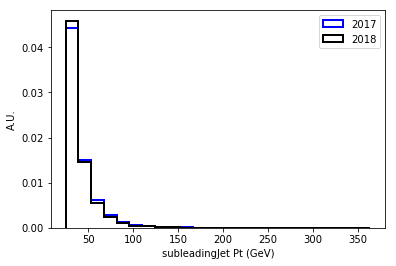

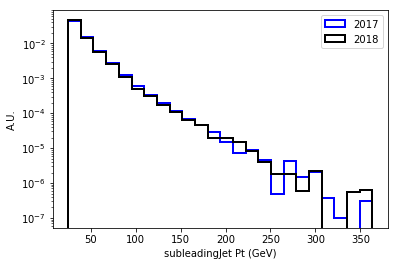

VBFleadJet_QGL


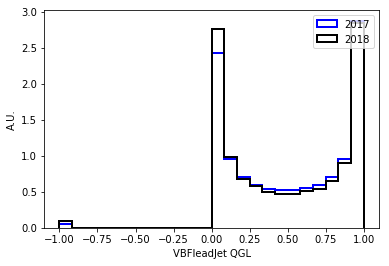

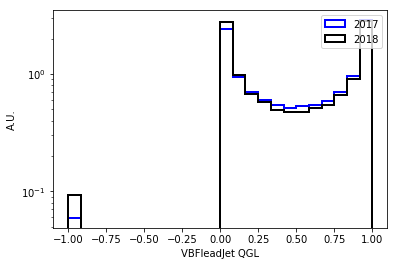

VBFsubleadJet_QGL


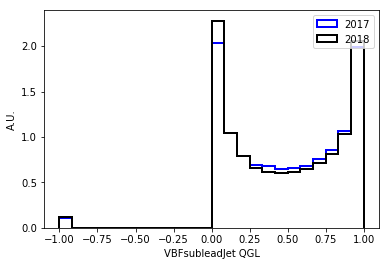

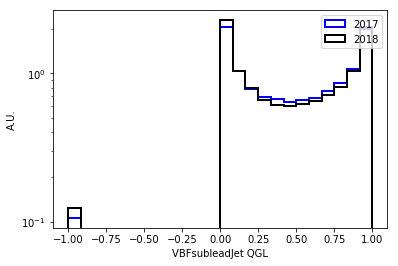

VBFDelta_phi


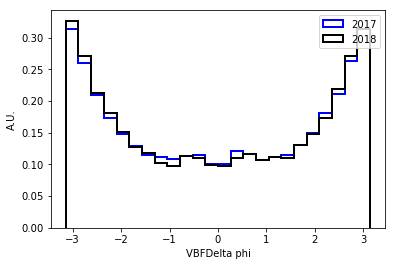

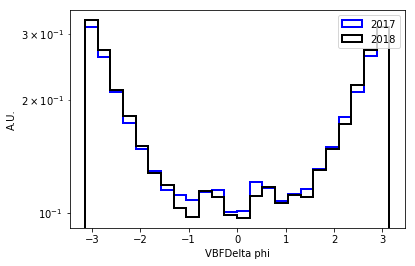

VBFJet_mjj


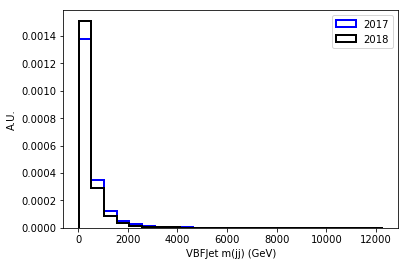

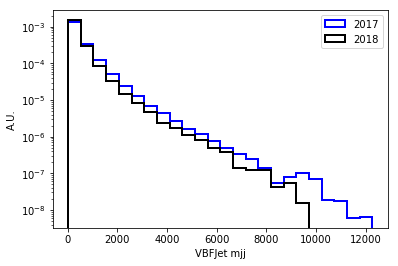

VBFProd_eta


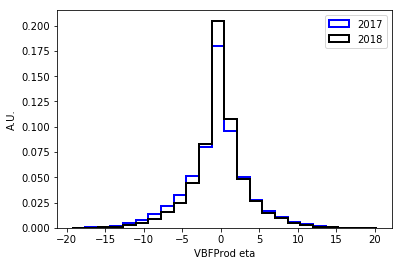

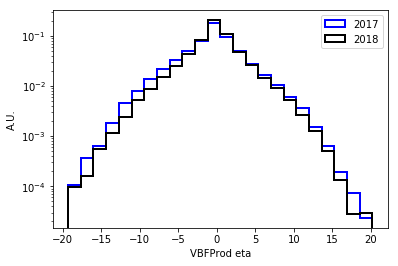

VBFJet_Delta_eta


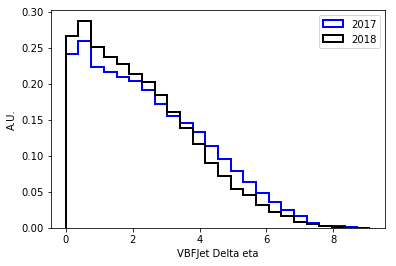

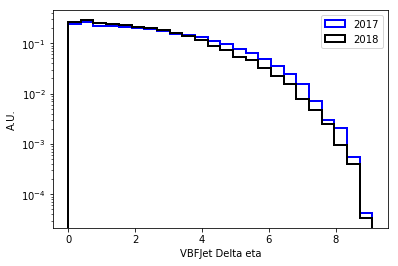

VBFCentrality_jg


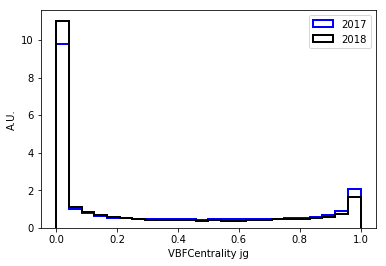

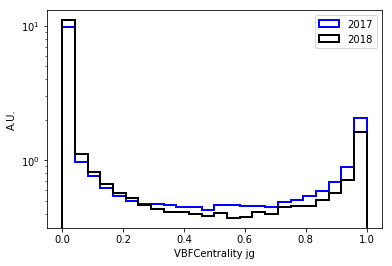

VBFCentrality_jb


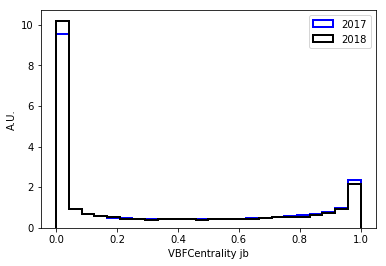

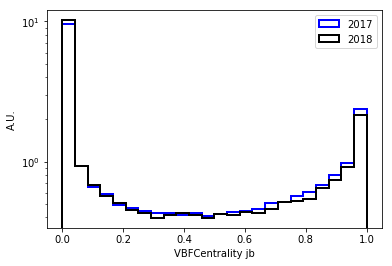

VBFDeltaR_jg


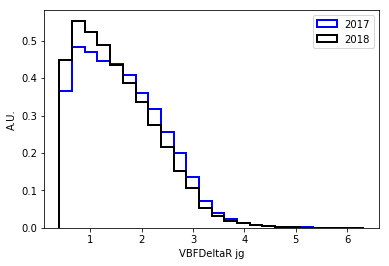

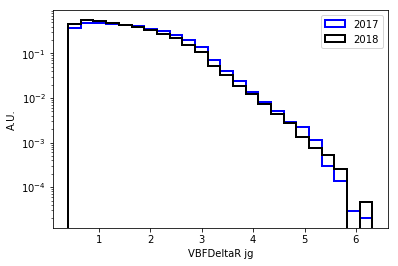

VBFDeltaR_jb


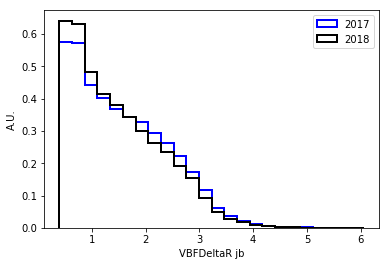

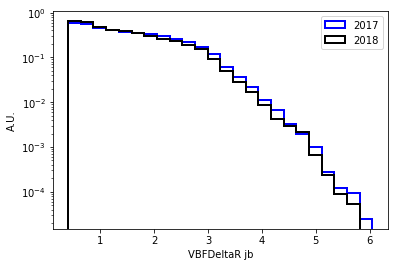

VBFleadJet_pt


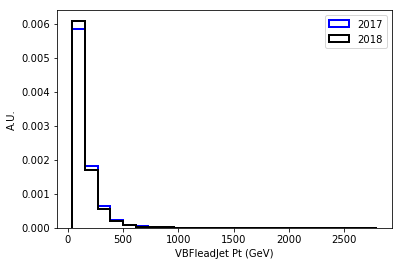

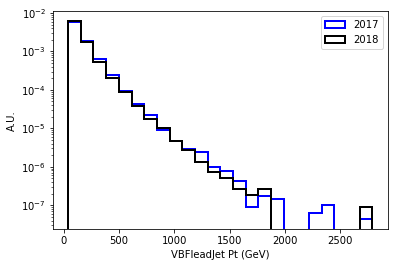

VBFleadJet_eta


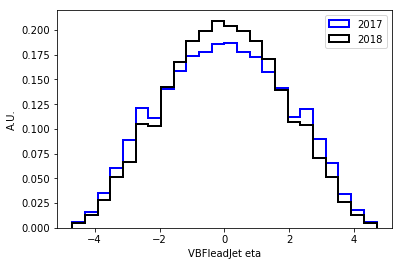

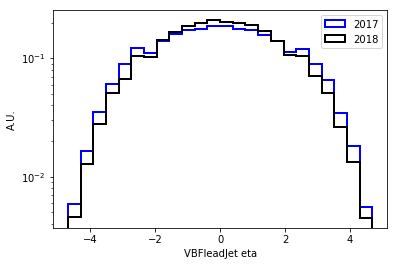

VBFsubleadJet_pt


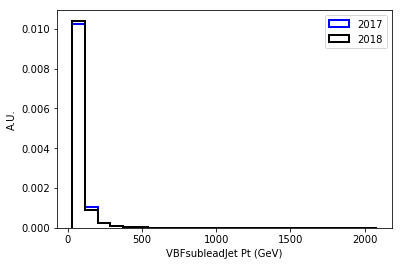

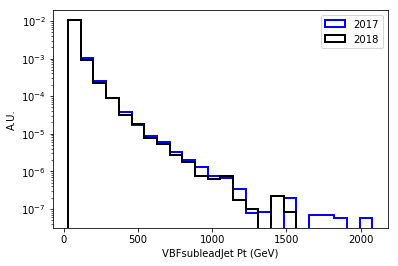

VBFsubleadJet_eta


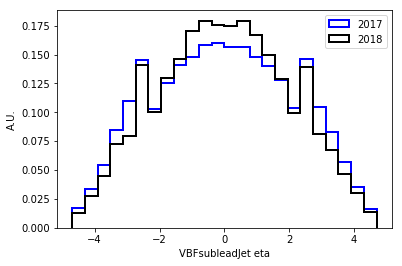

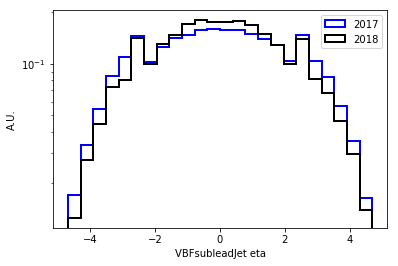

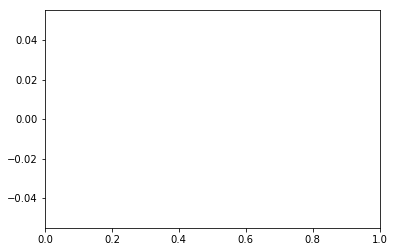

In [12]:
#plotting routine
numbins=25
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    feat=feat.replace('noexpand:','')
    #set the same range
    nbins = np.linspace(min(min(df_2017[feat]),min(df_2017[feat])), max(max(df_2017[feat]),max(df_2018[feat])) , numbins)
     
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_2017[feat],label='2017',histtype='step',bins=nbins,color='blue',density='True',weights=df_2017['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_2018[feat],label='2018',histtype='step',bins=nbins,color='black',density='True',weights=df_2018['weight'],linewidth=2.0)
    plt.legend(loc="upper right")
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)').replace('mjj','m(jj) (GeV)'))
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+".png"))
    plt.show()
    
    plt.yscale('log')
    val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_2017[feat],label='2017',histtype='step',bins=nbins,color='blue',density='True',weights=df_2017['weight'],linewidth=2.0)
    val_of_bins_x2, edges_of_bins_x2, patches_x2  = plt.hist(df_2018[feat],label='2018',histtype='step',bins=nbins,color='black',density='True',weights=df_2018['weight'],linewidth=2.0)
    plt.ylabel('A.U.')
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt (GeV)').replace('MX','MX (GeV)').replace('genMhh','gen M(HH) (GeV)').replace('mass','mass (GeV)'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat).replace('/','_').replace('(','').replace(')','')+"_log.png"))


    plt.show()
    plt.yscale('linear')


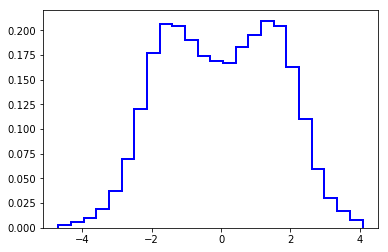

In [87]:
feat='dijet_eta'
val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_2018[feat],label='2017',histtype='step',bins=nbins,color='blue',density='True',weights=df_2018['weight'],linewidth=2.0)


In [116]:
df_2018.query('ttHScore>=0.26 & MX <= 500').shape

(55730, 36)

In [120]:
sum(df_2018['weight'])

157.97660403858572

In [121]:
sum(df_2017['weight'])

86.18388155676446

In [14]:
check_for_nan(df_2017,'event')

rho                      0
event                    0
ttHScore                 0
HHbbggMVA                0
diHiggs_pt               0
diHiggs_mass             0
genMhh                   0
MX                       0
dijet_pt                 0
dijet_eta                0
diphoton_pt              0
diphoton_eta             0
weight                   0
absCosThetaStar_CS       0
absCosTheta_bb           0
absCosTheta_gg           0
leadingPhoton_pt         0
leadingPhoton_eta        0
subleadingPhoton_pt      0
subleadingPhoton_eta     0
leadingJet_pt            0
leadingJet_eta           0
subleadingJet_eta        0
subleadingJet_pt         0
VBFleadJet_QGL          65
VBFsubleadJet_QGL        6
VBFDelta_phi             0
VBFJet_mjj               0
VBFProd_eta              0
VBFJet_Delta_eta         0
VBFCentrality_jg         0
VBFCentrality_jb         0
VBFDeltaR_jg             0
VBFDeltaR_jb             0
VBFleadJet_pt            0
VBFleadJet_eta           0
VBFsubleadJet_pt         0
V

,rho,event,ttHScore,HHbbggMVA,diHiggs_pt,diHiggs_mass,genMhh,MX,dijet_pt,dijet_eta,...,VBFProd_eta,VBFJet_Delta_eta,VBFCentrality_jg,VBFCentrality_jb,VBFDeltaR_jg,VBFDeltaR_jb,VBFleadJet_pt,VBFleadJet_eta,VBFsubleadJet_pt,VBFsubleadJet_eta
0,18.320984,39508820,0.129692,0.001157,239.796677,346.317047,0.0,299.434357,101.876640,0.679023,...,0.145931,0.082274,0.000000e+00,4.964404e-23,1.221618,0.554604,198.738663,0.343081,61.611668,0.425355
1,28.522774,39508923,0.352703,0.056793,76.760056,246.750351,0.0,305.516998,59.812984,-1.440960,...,-0.500824,1.435168,2.655663e-06,8.876153e-03,1.436556,2.127959,110.666855,-0.598828,93.948891,0.836340
2,21.086554,39509665,0.296167,0.000722,44.292023,272.574158,0.0,287.278656,72.131989,-0.510199,...,-0.605113,1.982700,9.999911e-01,2.760382e-01,0.591208,1.614816,52.451794,1.605893,40.839863,-0.376808
3,28.876116,39509728,0.176372,0.005285,171.957245,358.074768,0.0,338.149078,49.586617,3.508230,...,-0.202092,2.492185,9.665884e-01,2.887828e-02,0.967068,0.442488,191.944992,2.408269,73.578171,-0.083916
4,16.465849,39509776,0.507535,0.001673,165.163177,367.555786,0.0,296.399475,95.384636,-1.439367,...,-2.601670,3.402493,6.105099e-01,2.579695e-01,0.631066,0.747321,180.213440,2.242143,37.051216,-1.160349
5,7.954564,39510158,0.405768,0.000902,65.245934,429.769928,0.0,490.412964,55.984573,1.053684,...,-0.189988,2.030730,5.588714e-03,2.311819e-02,0.798341,1.891712,77.058510,0.098316,33.242222,-1.932414
6,25.743311,39510346,0.714000,0.090970,524.921021,517.385437,0.0,541.163757,266.678162,-0.239560,...,-7.146543,5.941476,4.530064e-01,8.812785e-01,2.572887,3.357520,397.641235,1.675075,141.715332,-4.266401
7,31.900454,39589876,0.930324,0.189393,140.061432,446.631561,0.0,458.302887,184.141876,0.840942,...,3.926523,2.828955,4.789349e-03,2.810010e-01,1.968623,1.389570,110.096436,3.849076,53.774021,1.020121
8,18.528124,39589977,0.459300,0.000045,80.984222,392.568817,0.0,379.837585,14.392025,-1.419640,...,0.155700,0.034934,0.000000e+00,0.000000e+00,1.492539,0.599338,225.703125,0.377508,138.792694,0.412442
9,36.784855,39590105,0.189281,0.001162,79.085968,403.527954,0.0,305.960358,94.824409,0.241225,...,-1.027527,2.414476,4.381444e-04,5.758314e-01,1.315644,0.485503,257.015350,-1.862903,60.661068,0.551573


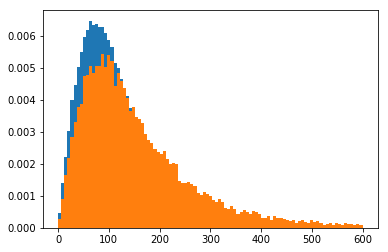

In [24]:
_,_,_ = plt.hist(df_2018['diHiggs_pt'],bins=np.linspace(0,600,100),density=1)

_,_,_ = plt.hist(df_2018.query('MX>500')['diHiggs_pt'],bins=np.linspace(0,600,100),density=1)


### Test / training plots

In [6]:
year='FullRunII'

training = 'lt' #greater or less than
 
indir='/work/nchernya/HHbbgg_ETH_devel/root_files/soumya_MX500_training/'

#file_in = 'Total_preselection_diffNaming_transformedMVA_MX_%s_500_ttH_0p26.root'%training
#file_in = 'Total_preselection_diffNaming_transformedMVA_MX_C2V0_ttH_0p26.root'
file_in = 'Total_preselection_diffNaming_transformedMVA_qqHH_doublecat_MX_%s_500_14_05_2020.root'%training
#file_in = 'Total_preselection_diffNaming_transformedMVA_14_05_2020.root'

process_VBFHH = 'reducedTree_sig'
#process_ggHH_LO ='reducedTree_bkg_GluGluToHHTo2B2G_node_all'# reducedTree_bkg_hh_LO'
process_ggHH_LO ='reducedTree_bkg_hh_LO'
process_diphoton = 'reducedTree_bkg_DiPhotonJetsBox_'
process_diphoton1b = 'reducedTree_bkg_DiPhotonJetsBox1BJet_'
process_diphoton2b = 'reducedTree_bkg_DiPhotonJetsBox2BJets_'
process_tth = 'reducedTree_bkg_tth'


cuts='(ttHScore>0.26)'
#cuts='(ttHScore>0.26)and (lumi>50&lumi<60)'

#features='weight,ttHScore,CMS_hgg_mass,MX,Mjj,event,lumi,overlapSave,MVAOutput,MVAOutput1,MVAOutput2,MVAOutputTransformed'.split(',')
features='weight,ttHScore,CMS_hgg_mass,MX,Mjj,event,lumi,overlapSave,MVAOutput,MVAOutputTransformed'.split(',')
out_dir = indir+'plots_MVAprob_%s_500/'%training

df_VBFHH = load_data_rpd(indir+file_in, features, process_VBFHH,'',cuts) 
df_ggHH_LO = load_data_rpd(indir+file_in, features, process_ggHH_LO,'',cuts) 
df_diphoton = load_data_rpd(indir+file_in, features, process_diphoton,'',cuts) 
df_diphoton1b = load_data_rpd(indir+file_in, features, process_diphoton1b,'',cuts) 
df_diphoton2b = load_data_rpd(indir+file_in, features, process_diphoton2b,'',cuts) 
#df_tth = load_data_rpd(indir+file_in, features, process_tth,'',cuts) 


###########################


utils.IO.plotFolder = indir

Entries in ntuple:
4728346
Entries in ntuple:
433610
Entries in ntuple:
434249
Entries in ntuple:
18633
Entries in ntuple:
9262


In [7]:
df_VBFHH['weight'] = df_VBFHH['weight']*df_VBFHH['lumi']*0.5
df_ggHH_LO['weight'] = df_ggHH_LO['weight']*df_ggHH_LO['lumi']*0.008
df_diphoton['weight'] = df_diphoton['weight']*df_diphoton['lumi']*2.9
df_diphoton1b['weight'] = df_diphoton1b['weight']*df_diphoton1b['lumi']*2.9
df_diphoton2b['weight'] = df_diphoton2b['weight']*df_diphoton2b['lumi']*2.9
#df_tth['weight'] = df_tth['weight']*df_tth['lumi']

df_diphoton['weight'] = df_diphoton['weight']*df_diphoton['overlapSave']
df_diphoton = pd.concat([df_diphoton,df_diphoton1b,df_diphoton2b],ignore_index=True)


In [12]:
import plotting_utils as plotting
reload(plotting)

<module 'plotting_utils' from '/work/nchernya/HHbbgg_ETH_devel/Training/python/plotting_utils.py'>

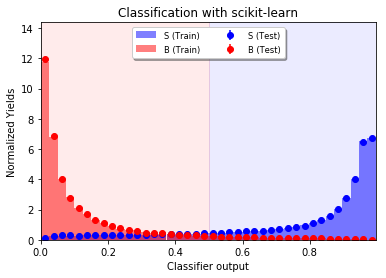

In [14]:
Y_pred_sig_train = df_VBFHH.query('event%2==0')['MVAOutput']
weights_sig_train = df_VBFHH.query('event%2==0')['weight']
Y_pred_bkg_train = df_diphoton.query('event%2==0')['MVAOutput']
weights_bkg_train = df_diphoton.query('event%2==0')['weight']
Y_pred_sig_test = df_VBFHH.query('event%2!=0')['MVAOutput']
weights_sig_test = df_VBFHH.query('event%2!=0')['weight']
Y_pred_bkg_test =  df_diphoton.query('event%2!=0')['MVAOutput']
weights_bkg_test =  df_diphoton.query('event%2!=0')['weight']
outstr='DiPhoton'
plot_classifier = plotting.plot_classifier_output_on_top(Y_pred_sig_train,Y_pred_bkg_train,Y_pred_sig_test,Y_pred_bkg_test,weights_sig_train,weights_bkg_train,weights_sig_test,weights_bkg_test,outString=outstr)


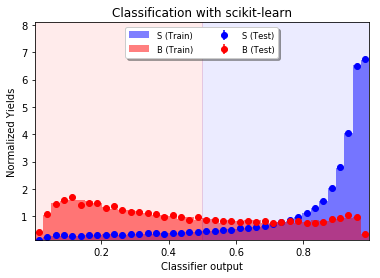

In [15]:
Y_pred_bkg_train = df_ggHH_LO.query('event%2==0')['MVAOutput']
weights_bkg_train = df_ggHH_LO.query('event%2==0')['weight']
Y_pred_bkg_test =  df_ggHH_LO.query('event%2!=0')['MVAOutput']
weights_bkg_test =  df_ggHH_LO.query('event%2!=0')['weight']
outstr='ggHH'
plot_classifier_gghh = plotting.plot_classifier_output_on_top(Y_pred_sig_train,Y_pred_bkg_train,Y_pred_sig_test,Y_pred_bkg_test,weights_sig_train,weights_bkg_train,weights_sig_test,weights_bkg_test,outString=outstr) 

## Making use of other probabilities ? 

In [44]:
year='FullRunII'

training = 'lt' #greater or less than
 
indir='/work/nchernya/HHbbgg_ETH_devel/root_files/soumya_MX500_training/'

#file_in = 'Total_preselection_diffNaming_transformedMVA_MX_%s_500_ttH_0p26.root'%training
#file_in = 'Total_preselection_diffNaming_transformedMVA_MX_C2V0_ttH_0p26.root'
file_in = 'Total_preselection_diffNaming_transformedMVA_qqHH_doublecat_MX_%s_500_14_05_2020.root'%training
#file_in = 'Total_preselection_diffNaming_transformedMVA_14_05_2020.root'

process_VBFHH = 'reducedTree_sig'
#process_ggHH_LO ='reducedTree_bkg_GluGluToHHTo2B2G_node_all'# reducedTree_bkg_hh_LO'
process_ggHH_LO ='reducedTree_bkg_hh_LO'
process_diphoton = 'reducedTree_bkg_DiPhotonJetsBox_'
process_diphoton1b = 'reducedTree_bkg_DiPhotonJetsBox1BJet_'
process_diphoton2b = 'reducedTree_bkg_DiPhotonJetsBox2BJets_'
process_tth = 'reducedTree_bkg_tth'


cuts='(ttHScore>0.26)'
#cuts='(ttHScore>0.26)and (lumi>50&lumi<60)'

#features='weight,ttHScore,CMS_hgg_mass,MX,Mjj,event,lumi,overlapSave,MVAOutput,MVAOutput1,MVAOutput2,MVAOutputTransformed'.split(',')
features='weight,ttHScore,CMS_hgg_mass,MX,Mjj,event,lumi,overlapSave,MVAOutput,MVAOutputTransformed'.split(',')
out_dir = indir+'plots_MVAprob_%s_500/'%training

df_VBFHH = load_data_rpd(indir+file_in, features, process_VBFHH,'',cuts) 
df_ggHH_LO = load_data_rpd(indir+file_in, features, process_ggHH_LO,'',cuts) 
df_diphoton = load_data_rpd(indir+file_in, features, process_diphoton,'',cuts) 
df_diphoton1b = load_data_rpd(indir+file_in, features, process_diphoton1b,'',cuts) 
df_diphoton2b = load_data_rpd(indir+file_in, features, process_diphoton2b,'',cuts) 
#df_tth = load_data_rpd(indir+file_in, features, process_tth,'',cuts) 


###########################


utils.IO.plotFolder = indir

Entries in ntuple:
4728346
Entries in ntuple:
433610
Entries in ntuple:
434249
Entries in ntuple:
18633
Entries in ntuple:
9262


In [169]:
year='FullRunII'
training = 'gt' #greater or less than
indir='/work/nchernya/HHbbgg_ETH_devel/root_files/soumya_MX500_training/'
file_in = 'Total_preselection_diffNaming_transformedMVA_MX_%s_500_ttH_0p26.root'%training

df_VBFHH_old = load_data_rpd(indir+file_in, features, process_VBFHH,'',cuts) 
df_ggHH_LO_old = load_data_rpd(indir+file_in, features, process_ggHH_LO,'',cuts) 
df_diphoton_old = load_data_rpd(indir+file_in, features, process_diphoton,'',cuts) 
df_diphoton1b_old = load_data_rpd(indir+file_in, features, process_diphoton1b,'',cuts) 
df_diphoton2b_old = load_data_rpd(indir+file_in, features, process_diphoton2b,'',cuts) 


Entries in ntuple:
1350651
Entries in ntuple:
392749
Entries in ntuple:
125450
Entries in ntuple:
5622
Entries in ntuple:
2671


In [41]:
print sum(df_ggHH_LO.query('MX>0')['weight'])
print sum(df_ggHH_LO.query('MVAOutputTransformed>0.83 & MX>0')['weight'])
print sum(df_ggHH_LO.query('MVAOutputTransformed>0.83 & MX>0')['weight'])/sum(df_ggHH_LO.query('MX>0')['weight'])

0.0652566361453
0.000775657891083
0.0118862683844


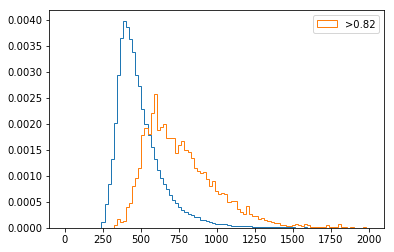

In [220]:
_,bins,_ = plt.hist(df_ggHH_LO['MX'],weights=df_ggHH_LO['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='')
_,_,_ = plt.hist(df_ggHH_LO.query('MVAOutputTransformed>0.65')['MX'],weights=df_ggHH_LO.query('MVAOutputTransformed>0.65')['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='>0.82')

plt.legend()
#plt.title('MVAOutputTransformed>0.44')

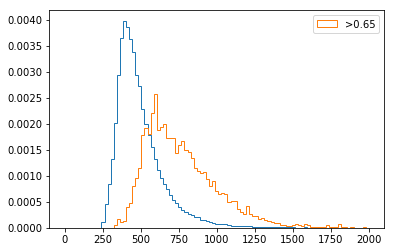

In [206]:
_,bins,_ = plt.hist(df_ggHH_LO['MX'],weights=df_ggHH_LO['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='')
_,_,_ = plt.hist(df_ggHH_LO.query('MVAOutputTransformed>0.65')['MX'],weights=df_ggHH_LO.query('MVAOutputTransformed>0.65')['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='>0.65')

plt.legend()
#plt.title('MVAOutputTransformed>0.44')

Text(0.5,1,'MVAOutputTransformed>0.44')

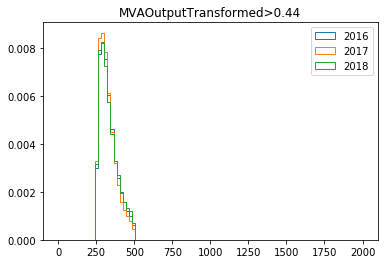

In [16]:
_,bins,_ = plt.hist(df_VBFHH.query('lumi>35&lumi<40&MVAOutputTransformed>0.7')['MX'],weights=df_VBFHH.query('lumi>35&lumi<40&MVAOutputTransformed>0.7')['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='2016')
_,_,_ = plt.hist(df_VBFHH.query('lumi>40&lumi<50&MVAOutputTransformed>0.7')['MX'],weights=df_VBFHH.query('lumi>40&lumi<50&MVAOutputTransformed>0.7')['weight'],histtype='step',bins=bins,density=1,label='2017')
_,_,_ = plt.hist(df_VBFHH.query('lumi>50&lumi<60&MVAOutputTransformed>0.7')['MX'],weights=df_VBFHH.query('lumi>50&lumi<60&MVAOutputTransformed>0.7')['weight'],histtype='step',bins=bins,density=1,label='2018')
plt.legend()
#plt.title('MVAOutputTransformed>0.44')

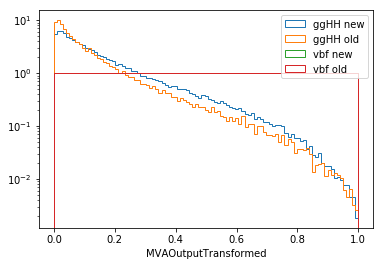

In [203]:
plt.yscale('log')
_,bins,_ = plt.hist(df_ggHH_LO['MVAOutputTransformed'],weights=df_ggHH_LO['weight'],histtype='step',bins=np.linspace(0,1,100),density=1,label='ggHH new')
_,_,_ = plt.hist(df_ggHH_LO_old['MVAOutputTransformed'],weights=df_ggHH_LO_old['weight'],histtype='step',bins=bins,density=1,label='ggHH old')

_,bins,_ = plt.hist(df_VBFHH['MVAOutputTransformed'],weights=df_VBFHH['weight'],histtype='step',bins=np.linspace(0,1,100),density=1,label='vbf new')
_,_,_ = plt.hist(df_VBFHH_old['MVAOutputTransformed'],weights=df_VBFHH_old['weight'],histtype='step',bins=bins,density=1,label='vbf old')

plt.xlabel('MVAOutputTransformed')
plt.legend()
#plt.title('MVAOutputTransformed>0.44')

In [45]:
df_VBFHH['weight'] = df_VBFHH['weight']*df_VBFHH['lumi']*0.5
df_ggHH_LO['weight'] = df_ggHH_LO['weight']*df_ggHH_LO['lumi']*0.008
df_diphoton['weight'] = df_diphoton['weight']*df_diphoton['lumi']*2.9
df_diphoton1b['weight'] = df_diphoton1b['weight']*df_diphoton1b['lumi']*2.9
df_diphoton2b['weight'] = df_diphoton2b['weight']*df_diphoton2b['lumi']*2.9
#df_tth['weight'] = df_tth['weight']*df_tth['lumi']

In [49]:
sum(df_diphoton.query('MVAOutputTransformed>0.85 & MX>0')['weight'])

6.564191514620861

In [46]:
df_diphoton['weight'] = df_diphoton['weight']*df_diphoton['overlapSave']
df_diphoton = pd.concat([df_diphoton,df_diphoton1b,df_diphoton2b],ignore_index=True)


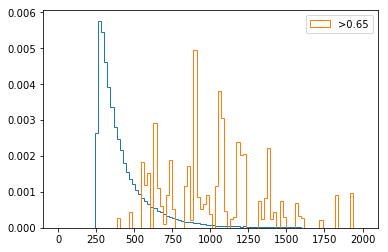

In [208]:
_,bins,_ = plt.hist(df_diphoton['MX'],weights=df_diphoton['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='')
_,_,_ = plt.hist(df_diphoton.query('MVAOutputTransformed>0.65')['MX'],weights=df_diphoton.query('MVAOutputTransformed>0.65')['weight'],histtype='step',bins=np.linspace(0,2000,100),density=1,label='>0.65')

plt.legend()
#plt.title('MVAOutputTransformed>0.44')

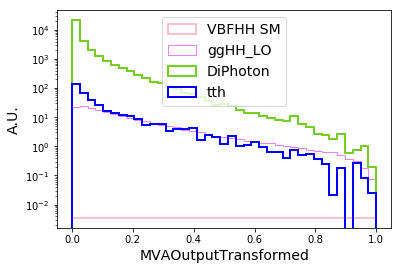

In [19]:
what='MVAOutputTransformed'
plt.yscale('log')
n, bins, patches = plt.hist(df_VBFHH[what],color='pink', bins=np.linspace(0,1,40),weights=df_VBFHH['weight'], alpha=1.,density=0,label='VBFHH SM',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_ggHH_LO[what],color='violet', bins=bins,weights=df_ggHH_LO['weight']*1000, alpha=1.,density=0,label='ggHH_LO',histtype='step')
_,_,_ = plt.hist(df_diphoton[what],color='#76cd26', bins=bins,weights=df_diphoton['weight'], alpha=1.,density=0,label='DiPhoton',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_tth[what],color='blue', bins=bins,weights=df_tth['weight'], alpha=1.,density=0,label='tth',histtype='step',linewidth=2)

plt.xlabel(what, fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper center', fontsize=14)
#plt.savefig(utils.IO.plotFolder+"_%s_%s.png"%(what,training))
plt.show()

In [64]:
sum(df_ggHH_LO['weight'])

0.04116617660235705

In [152]:
yields_vbfHH = []
yields_ggHH = []
yields_bkg_fullmass = []
yields_bkg = []
yields_tth = []
#mgg_cut = '&(CMS_hgg_mass>115)&(CMS_hgg_mass<135)'
mgg_cut = '&(CMS_hgg_mass>122)&(CMS_hgg_mass<128)'
MVAcut = '(MVAOutputTransformed>0.44)'
what_to_cut = 'ttHScore'
for cut in np.linspace(0., 1, 50):
    yields_vbfHH.append(sum(df_VBFHH.query(MVAcut+mgg_cut+'&(ttHScore>%s)'%cut)['weight']))
    yields_ggHH.append(sum(df_ggHH_LO.query(MVAcut+mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_bkg_fullmass.append(sum(df_diphoton.query(MVAcut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_bkg.append(sum(df_diphoton.query(MVAcut+mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 
    yields_tth.append(sum(df_tth.query(MVAcut+mgg_cut+'&(ttHScore>%s)'%cut)['weight'])) 

In [153]:
sign = []
power = []
sign_kl = dict()
for i in range(len(yields_vbfHH)):
    if (yields_bkg_fullmass[i]>=6) : sign.append(yields_vbfHH[i]/np.sqrt(yields_bkg[i])) 
    else : sign.append(0.)
  #  sign.append(yields_vbfHH[i]*100/np.sqrt(yields_bkg[i])) 
  #  sign.append(yields_vbfHH[i]*100/np.sqrt(yields_tth[i]+yields_bkg[i])) 
   # power.append(yields_vbfHH[i]*100/np.sqrt(yields_bkg[i]+yields_vbfHH[i]))

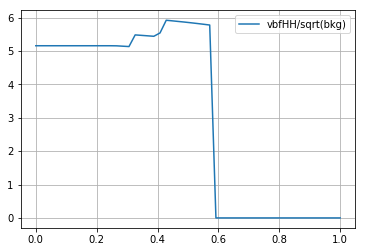

In [154]:
plt.plot(np.linspace(0., 1, 50), sign, label="vbfHH/sqrt(bkg)")
#plt.plot(np.linspace(0., .1, 50), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()

In [50]:
yields_vbfHH = []
yields_ggHH = []
yields_bkg_fullmass = []
yields_bkg = []
mgg_cut = '(CMS_hgg_mass>115)&(CMS_hgg_mass<135)'
MVAcut = ''
what_to_cut = 'MVAOutputTransformed'
for cut in np.linspace(0., 1, 100):
    yields_vbfHH.append(sum(df_VBFHH.query(MVAcut+mgg_cut+'&(MVAOutputTransformed>%s)'%cut)['weight']))
    yields_ggHH.append(sum(df_ggHH_LO.query(MVAcut+mgg_cut+'&(MVAOutputTransformed>%s)'%cut)['weight'])) 
    yields_bkg_fullmass.append(sum(df_diphoton.query(MVAcut+'(MVAOutputTransformed>%s)'%cut)['weight'])) 
    yields_bkg.append(sum(df_diphoton.query(MVAcut+mgg_cut+'&(MVAOutputTransformed>%s)'%cut)['weight'])) 

In [59]:
sign = []
power = []
sign_kl = dict()
for i in range(len(yields_vbfHH)):
    if (yields_bkg_fullmass[i]>=4) : sign.append(yields_vbfHH[i]/np.sqrt(yields_bkg[i])) 
    else : sign.append(0.)
  #  sign.append(yields_vbfHH[i]*100/np.sqrt(yields_bkg[i])) 
  #  sign.append(yields_vbfHH[i]*100/np.sqrt(yields_ggHH[i])) 
  #  power.append(yields_vbfHH[i]*100/np.sqrt(yields_bkg[i]+yields_vbfHH[i]))

0.8282828282828284


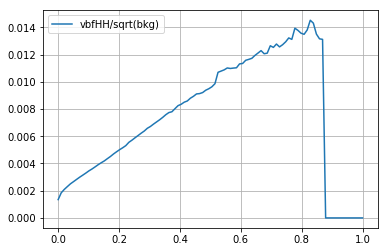

In [60]:
plt.plot(np.linspace(0., 1, 100), sign, label="vbfHH/sqrt(bkg)")
#plt.plot(np.linspace(0., .1, 50), power, label="vbfHH/sqrt(bkg+vbfHH)")
plt.grid()
plt.legend()
print np.linspace(0., 1, 100)[sign.index(max(sign))]

In [104]:
yields_vbfHH = []
yields_ggHH = []
yields_bkg_fullmass = []
yields_bkg = []
mgg_cut = '&(CMS_hgg_mass>115)&(CMS_hgg_mass<135)'
MVAcut = '(MVAOutputTransformed>0.82)'
for cut in np.linspace(0., .04, 30):
    yields_vbfHH.append(sum(df_VBFHH.query(MVAcut+mgg_cut+'&(MVAOutput2<%s)'%cut)['weight']))
    yields_ggHH.append(sum(df_ggHH_LO.query(MVAcut+mgg_cut+'&(MVAOutput2<%s)'%cut)['weight'])) 
    yields_bkg_fullmass.append(sum(df_diphoton.query(MVAcut+'&(MVAOutput2<%s)'%cut)['weight'])) 
    yields_bkg.append(sum(df_diphoton.query(MVAcut+mgg_cut+'&(MVAOutput2<%s)'%cut)['weight'])) 

In [105]:
sign = []
sign2 = []
sign3 = []
power = []
sign_kl = dict()
for i in range(len(yields_vbfHH)):
    if (yields_bkg_fullmass[i]>=6) : sign.append(yields_vbfHH[i]/(yields_bkg[i]+np.sqrt(yields_ggHH[i]))) 
    else : sign.append(0.)
    if (yields_bkg_fullmass[i]>=6) : sign2.append(yields_vbfHH[i]/(np.sqrt(yields_ggHH[i]))) 
    else : sign2.append(0.)
    if (yields_bkg_fullmass[i]>=6) : sign3.append(yields_vbfHH[i]/(yields_bkg[i])) 
    else : sign3.append(0.)                                                
   # sign.append(yields_vbfHH[i]/np.sqrt(yields_bkg[i])) 
   # sign.append(yields_vbfHH[i]/np.sqrt(yields_ggHH[i])) 
  #  power.append(yields_vbfHH[i]*100/np.sqrt(yields_bkg[i]+yields_vbfHH[i]))

Text(0.5,0,'MVAOutput1 : diphoton Prob')

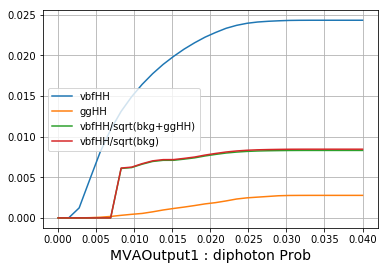

In [106]:
plt.plot(np.linspace(0., .04, 30), yields_vbfHH, label="vbfHH")
plt.plot(np.linspace(0., .04, 30), yields_ggHH, label="ggHH")
#plt.plot(np.linspace(0., .04, 30), yields_bkg_fullmass, label="bkg")
plt.plot(np.linspace(0., .04, 30), sign, label="vbfHH/sqrt(bkg+ggHH)")
#plt.plot(np.linspace(0., .04, 30), sign2, label="vbfHH/sqrt(ggHH)")
plt.plot(np.linspace(0., .04, 30), sign3, label="vbfHH/sqrt(bkg)")
plt.grid()
plt.legend()
plt.xlabel('MVAOutput1 : diphoton Prob', fontsize=14)
#plt.savefig(utils.IO.plotFolder+"diphotonProb.png")

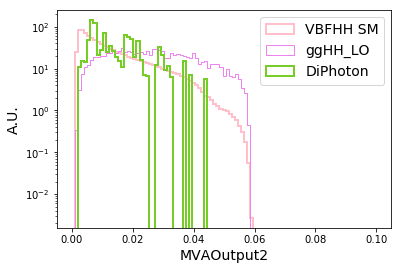

In [159]:
what='MVAOutput2'
cut='(MVAOutputTransformed>0.47)'# ' &((CMS_hgg_mass<115) or(CMS_hgg_mass>135)) '
plt.yscale('log')
n, bins, patches = plt.hist(df_VBFHH.query(cut)[what],color='pink', bins=np.linspace(0,.1,100),weights=df_VBFHH.query(cut)['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_ggHH_LO.query(cut)[what],color='violet', bins=bins,weights=df_ggHH_LO.query(cut)['weight'], alpha=1.,normed=1,label='ggHH_LO',histtype='step')
_,_,_ = plt.hist(df_diphoton.query(cut)[what],color='#76cd26', bins=bins,weights=df_diphoton.query(cut)['weight'], alpha=1.,normed=1,label='DiPhoton',histtype='step',linewidth=2)

plt.xlabel(what, fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper right', fontsize=14)
plt.show()

/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


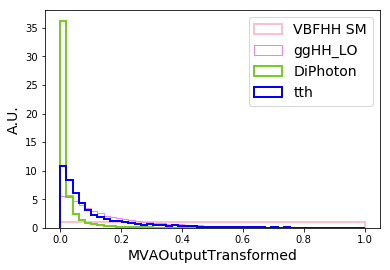

In [14]:
what='MVAOutputTransformed'
cut='(lumi>30 & lumi<40)'
plt.clf()
#plt.yscale('log')
n, bins, patches = plt.hist(df_VBFHH.query(cut)[what],color='pink', bins=np.linspace(0,1,50),weights=df_VBFHH.query(cut)['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_ggHH_LO.query(cut)[what],color='violet', bins=bins,weights=df_ggHH_LO.query(cut)['weight'], alpha=1.,normed=1,label='ggHH_LO',histtype='step')
_,_,_ = plt.hist(df_diphoton.query(cut)[what],color='#76cd26', bins=bins,weights=df_diphoton.query(cut)['weight'], alpha=1.,normed=1,label='DiPhoton',histtype='step',linewidth=2)
_,_,_ = plt.hist(df_tth.query(cut)[what],color='blue', bins=bins,weights=df_tth.query(cut)['weight'], alpha=1.,normed=1,label='tth',histtype='step',linewidth=2)

plt.xlabel(what, fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper right', fontsize=14)
plt.show()

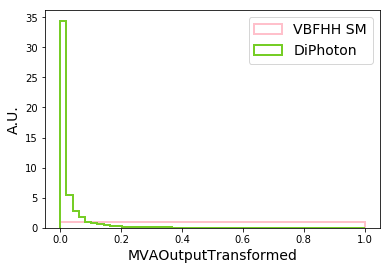

In [28]:
what='MVAOutputTransformed'
cut='(lumi>50 & lumi<60)'
plt.clf()
#plt.yscale('log')
n, bins, patches = plt.hist(df_VBFHH.query(cut)[what],color='pink', bins=np.linspace(0,1,50),weights=df_VBFHH.query(cut)['weight'], alpha=1.,normed=1,label='VBFHH SM',histtype='step',linewidth=2)
#_,_,_ = plt.hist(df_ggHH_LO.query(cut)[what],color='violet', bins=bins,weights=df_ggHH_LO.query(cut)['weight'], alpha=1.,normed=1,label='ggHH_LO',histtype='step')
_,_,_ = plt.hist(df_diphoton.query(cut)[what],color='#76cd26', bins=bins,weights=df_diphoton.query(cut)['weight'], alpha=1.,normed=1,label='DiPhoton',histtype='step',linewidth=2)
#_,_,_ = plt.hist(df_tth.query(cut)[what],color='blue', bins=bins,weights=df_tth.query(cut)['weight'], alpha=1.,normed=1,label='tth',histtype='step',linewidth=2)

plt.xlabel(what, fontsize=14)
plt.ylabel('A.U.', fontsize=14)
plt.legend(loc = 'upper right', fontsize=14)
plt.show()

In [25]:
sum(df_ggHH_LO['weight'])

0.20531778749891397

In [76]:
0.0010563804831458833/0.001077416002548204

0.9804759541787301

In [69]:
sum(df_VBFHH.query('MVAOutputTransformed>0.85 & MVAOutput2<0.02')['weight'])

0.05507554850393103

In [70]:
sum(df_VBFHH.query('MVAOutputTransformed>0.85 & MVAOutput2<2')['weight'])

0.05647839377357713

In [71]:
0.05507554850393103/0.05647839377357713

0.9751613816201975

In [ ]:
0.001769030105913951/0.0017794355907407365

In [32]:
a =   [[],[],[],[],[],[],[],[],[],[],[],[]]
a[0]   =   [0.001668      ,          0.001601      ]                                 
a[1]     =   [  0.004454   ,             0.004259   ]                                    
a[2]    =   [   0.001375    ,            0.001327    ]                                   
a[3]    =   [   0.01374      ,           0.01335      ]                                  
a[4]  =   [   0.01046       ,          0.01009       ]                                 
a[5]  =   [   0.0638         ,         0.06153        ]                                
a[6]    =   [   0.02617         ,        0.02526   ]

In [35]:
for i in range(0,len(a)):
    print a[i][0]/a[i][1]

1.04184884447
1.04578539563
1.03617181613
1.02921348315
1.03666997027
1.03689257273
1.0360253365


IndexError: list index out of range